##INSTALACION E IMPORTACION DE LIBRERIAS


In [ ]:
# Instalar las librerias
!pip install pandas rdkit tqdm chembl_webresource_client git+https://github.com/ikmckenz/adme-pred-py.git

  Cloning https://github.com/ikmckenz/adme-pred-py.git to /tmp/pip-req-build-2v48herm
  Running command git clone --filter=blob:none --quiet https://github.com/ikmckenz/adme-pred-py.git /tmp/pip-req-build-2v48herm
  Resolved https://github.com/ikmckenz/adme-pred-py.git to commit 8091a02fe5998b8ba237760ade7ff3400abbbcdd
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.8 MB/s eta 0:00:00
  Created wheel for adme-pred: filename=adme_pred-0.0.2-py3-none-any.whl size=18561 sha256=751d2e8c0f2bd54b9cd240707437f7d54d56d230318c28dc65761faf4e4fab1e
  Stored in directory: /tmp/pip-ephem-wheel-cache-satgth9j/wheels/0b/cd/8f/5b6314f4393bde6a8e1378ff709adf4c3a59e4ee2f4ef88256
Successfully built adme-pred
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninst

In [ ]:
# Instalar las librerias
!pip install pandas rdkit tqdm chembl_webresource_client


In [ ]:
# Importar libreria de RDKit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors

# Importar libreria para cambiar el directorio y guardar archivos
import os

# Importar libreria para ver una barra con el progreso de cada comando
from tqdm.auto import tqdm
tqdm.pandas()

import pandas as pd

from chembl_webresource_client.new_client import new_client

# Importar libreria de ADME
from adme_pred import ADME

# Importar las librerias para graficar
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import seaborn as sns

In [ ]:
def drug_likness_decriptors(df):
    # Desactivar las advertencias de asignación encadenada en pandas
    pd.options.mode.chained_assignment = None

    # Crear listas vacías para almacenar los descriptores
    NumHDonors_list = []
    NumHAcceptors_list = []
    MW_list = []
    LogP_list = []
    rotatable_bonds_list = []

    # Calcular los descriptores para cada molécula en la columna 'ROMol'
    for element in df['ROMol']:
        try:
            # Calcular el número de donadores de enlaces de hidrógeno
            NumHDonors = Descriptors.NumHDonors(element)
            NumHDonors_list.append(NumHDonors)
        except:
            NumHDonors_list.append('N/A')  # Si ocurre una excepción, agregar 'N/A' a la lista
            pass

        try:
            # Calcular el número de aceptores de enlaces de hidrógeno
            NumHAcceptors = Descriptors.NumHAcceptors(element)
            NumHAcceptors_list.append(NumHAcceptors)
        except:
            NumHAcceptors_list.append('N/A')  # Si ocurre una excepción, agregar 'N/A' a la lista
            pass

        try:
            # Calcular el peso molecular exacto
            MW = Descriptors.ExactMolWt(element)
            MW_list.append(MW)
        except:
            MW_list.append('N/A')  # Si ocurre una excepción, agregar 'N/A' a la lista
            pass

        try:
            # Calcular el logP
            LogP = Descriptors.MolLogP(element)
            LogP_list.append(LogP)
        except:
            LogP_list.append('N/A')  # Si ocurre una excepción, agregar 'N/A' a la lista
            pass

        try:
            # Calcular el número de enlaces rotativos
            rotatable_bonds = Descriptors.NumRotatableBonds(element)
            rotatable_bonds_list.append(rotatable_bonds)
        except:
            rotatable_bonds_list.append('N/A')  # Si ocurre una excepción, agregar 'N/A' a la lista
            pass

    # Agregar las listas de descriptores al DataFrame
    df['HBD'] = NumHDonors_list
    df['HBA'] = NumHAcceptors_list
    df['MW'] = MW_list
    df['logP'] = LogP_list
    df['nRotB'] = rotatable_bonds_list

    return df

In [ ]:
def add_druglikness_criteria(df):
  df['Lipinski'] = 0
  for i in range(len(df)):
    value_Lipinski = 0
    if df['MW'][i] <= 500:
      value_Lipinski = value_Lipinski + 1
    else:
      value_Lipinski = value_Lipinski
    if df['logP'][i] <= 5:
      value_Lipinski = value_Lipinski + 1
    else:
      value_Lipinski = value_Lipinski
    if df['HBD'][i] <= 5:
      value_Lipinski = value_Lipinski + 1
    else:
      value_Lipinski = value_Lipinski
    if df['HBA'][i] <= 5:
      value_Lipinski = value_Lipinski + 1
    else:
      value_Lipinski = value_Lipinski
    df['Lipinski'][i] = value_Lipinski
  print("Done Lipinski")

  df['RO3'] = 0
  for i in range(len(df)):
    value_RO3 = 0
    if df['MW'][i] <= 300:
      value_RO3 = value_RO3 + 1
    else:
      value_RO3 = value_RO3
    if df['logP'][i] <= 3:
      value_RO3 = value_RO3 + 1
    else:
      value_RO3 = value_RO3
    if df['HBD'][i] <= 3:
      value_RO3 = value_RO3 + 1
    else:
      value_RO3 = value_RO3
    if df['HBA'][i] <= 3:
      value_RO3 = value_RO3 + 1
    else:
      value_RO3 = value_RO3
    df['RO3'][i] = value_RO3
  print("Done RO3")
  return(df)

In [ ]:
# Cargar el contenido de drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Indicar la carpeta de trabajo
path_luz = '/content/drive/MyDrive/Proyecto análisis Lysil tRNA Sintetasa/Analisis_compuestos'
path_mer = '/content/drive/Shareddrives/Doctorado/Proyecto análisis Lysil tRNA Sintetasa/Analisis_compuestos'
os.chdir(path_luz)

In [ ]:
#Generar una variable con el nombre de la tabla que contiene la lista de moléculas activas del ensayo
lista_compuestos = pd.read_csv('lista_compuestos.csv',sep=  ';')

# LISTA COMPUESTOS


In [ ]:
lista_compuestos #this is a dataset obtained from ChEMBL database of around 18.000 interesting compunds which containted funcional group chromane

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key
0,CHEMBL1534871,NaN,NaN,Small molecule,NaN,454.55,8.0,13.0,4.08,96.69,...,32,7,1,0,454.1562,-1.49,NEUTRAL,C24H26N2O5S,Cc1cc(C)c2oc(C(=O)Nc3ccc(S(=O)(=O)N4CCCC(C)C4)...,DQBUPBQECIMBQP-UHFFFAOYSA-N
1,CHEMBL2420319,NaN,NaN,Small molecule,NaN,582.73,2.0,3.0,5.24,78.26,...,42,8,1,2,582.2301,-1.09,NEUTRAL,C33H34N4O4S,CN1CCN(CCC(=O)Nc2ccc(-c3cccc4c(=O)cc(N5CCOCC5)...,SECMQIPLSAXOJP-UHFFFAOYSA-N
2,CHEMBL165790,IPRIFLAVONE,7-ISOPROPOXYISOFLAVONE|IPRIFLAVONE|NSC-755888|...,Small molecule,-1.0,280.32,158.0,659.0,4.25,39.44,...,21,3,0,0,280.1099,-0.08,NEUTRAL,C18H16O3,CC(C)Oc1ccc2c(=O)c(-c3ccccc3)coc2c1,SFBODOKJTYAUCM-UHFFFAOYSA-N
3,CHEMBL1574883,NaN,NaN,Small molecule,NaN,366.37,11.0,12.0,3.28,87.47,...,27,7,0,0,366.1216,-0.87,NEUTRAL,C20H18N2O5,COc1ccc2c(=O)c3c(=O)n(Cc4ccco4)c(C(C)C)nc3oc2c1,GZPJMVWCLLSMGU-UHFFFAOYSA-N
4,CHEMBL4804017,NaN,NaN,Unknown,NaN,470.52,NaN,NaN,3.55,121.47,...,34,9,3,0,470.2053,0.27,BASE,C25H30N2O7,CN(C)CCOc1ccc(-c2cc(=O)c3c(O)cc(OCCCCCC(=O)NO)...,MVVFMQBQTUASSH-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17941,CHEMBL3210229,NaN,NaN,Small molecule,NaN,297.29,4.0,4.0,3.70,62.80,...,22,4,1,0,297.0801,-0.77,ACID,C17H12FNO3,Cc1ccc(F)c(/N=C/c2c(O)oc3ccccc3c2=O)c1,KSAFKTYIEPYRRB-DJKKODMXSA-N
17942,CHEMBL4224907,NaN,NaN,Small molecule,NaN,477.49,1.0,2.0,4.62,115.07,...,34,8,2,0,477.0882,-0.09,NEUTRAL,C25H19NO7S,COc1c(NS(=O)(=O)c2ccc3ccccc3c2)cc2oc3cccc(OC)c...,PSAGQSNNEAMDSV-UHFFFAOYSA-N
17943,CHEMBL34286,NaN,NaN,Small molecule,NaN,212.59,1.0,12.0,1.86,70.67,...,14,4,2,0,211.9876,0.25,ACID,C9H5ClO4,O=c1c(O)c(O)oc2ccc(Cl)cc12,OUKHBRYSFUWDPR-UHFFFAOYSA-N
17944,CHEMBL3526993,NaN,NaN,Small molecule,NaN,844.72,2.0,3.0,-4.15,363.88,...,59,23,12,3,844.2273,1.49,ACID,C36H44O23,COc1ccc(-c2oc3cc(OCCO)cc(O)c3c(=O)c2O[C@@H]2O[...,RZJFQSHKRKMXIE-DGHKUZIUSA-N


In [ ]:
lista_columnas = ["ChEMBL ID", "Molecular Weight", "Targets", "Smiles" ] #interesting columns

In [ ]:
lista_compuestos_columnas = lista_compuestos[["ChEMBL ID", "Molecular Weight", "Targets", "Smiles" ]]

In [ ]:
lista_compuestos_columnas

,ChEMBL ID,Molecular Weight,Targets,Smiles
0,CHEMBL1534871,454.55,8.0,Cc1cc(C)c2oc(C(=O)Nc3ccc(S(=O)(=O)N4CCCC(C)C4)...
1,CHEMBL2420319,582.73,2.0,CN1CCN(CCC(=O)Nc2ccc(-c3cccc4c(=O)cc(N5CCOCC5)...
2,CHEMBL165790,280.32,158.0,CC(C)Oc1ccc2c(=O)c(-c3ccccc3)coc2c1
3,CHEMBL1574883,366.37,11.0,COc1ccc2c(=O)c3c(=O)n(Cc4ccco4)c(C(C)C)nc3oc2c1
4,CHEMBL4804017,470.52,NaN,CN(C)CCOc1ccc(-c2cc(=O)c3c(O)cc(OCCCCCC(=O)NO)...
...,...,...,...,...
17941,CHEMBL3210229,297.29,4.0,Cc1ccc(F)c(/N=C/c2c(O)oc3ccccc3c2=O)c1
17942,CHEMBL4224907,477.49,1.0,COc1c(NS(=O)(=O)c2ccc3ccccc3c2)cc2oc3cccc(OC)c...
17943,CHEMBL34286,212.59,1.0,O=c1c(O)c(O)oc2ccc(Cl)cc12
17944,CHEMBL3526993,844.72,2.0,COc1ccc(-c2oc3cc(OCCO)cc(O)c3c(=O)c2O[C@@H]2O[...


#FILTRADO 1 CON LIPINSKI


Christopher A. Lipinski hizo un análisis de las propiedades fisicoquímicas de los medicamentos disponibles en el mercado en el año 1997. A partir de los resultados que obtuvo, formuló una serie de reglas para predecir que tan adecuado podría ser un compuesto químico para ser administrado oralmente a un paciente.

*   No debe contener más de cinco donadores de enlaces por puentes de hidrógeno.
*   No debe contener más de diez aceptores de enlaces por puentes de hidrógeno.
*   Debe poseer un peso molecular inferior a 500 uma.
*   Debe poseer un coeficiente de reparto octanol-agua (log P) inferior a 5

Como pueden ver, todas las reglan contienen el número 5 o son multiplos de ese número. Por ese motivo se las conocoe como la regla de cinco de Lipinski

Si te interesa este tema podés leer más en este link: https://doi.org/10.1016/j.ddtec.2004.11.007

1) A partir de la tabla, seleccionar las columnas que tengan características de Lipinski

2) Armar una tabla nueva con las moléculas que cumplan con esas características

In [ ]:
lista_columnas = ["ChEMBL ID", "Molecular Weight", "Targets", "Smiles","AlogP","HBA (Lipinski)","HBD (Lipinski)","Inchi Key"]

##FILTRADO Y PASAJE COMPLETO MAS ORDENADO


df con compeustos pero solo las columnas que me interesan. Limpie los datos tambien, para poder filtrarlos


In [ ]:
#THIS IS A FILTER USING THE LIPISNKI RULES

In [ ]:
#OTRA MANERA DE FILTRAR LOS DATOS DEL COMPUESTO
#EL GRUPO FUNCIONAL FUE CHROMANE
import numpy as np
col_interesantes=["ChEMBL ID", "Molecular Weight", "Targets", "Smiles","AlogP","HBA (Lipinski)","HBD (Lipinski)","Inchi Key"]
compuestos= pd.read_csv('lista_compuestos.csv',sep=  ';')

comp_col=compuestos[col_interesantes]
comp_col

columnas_objeto=["AlogP","HBA (Lipinski)","HBD (Lipinski)"] #las quiero pasar a float
#xq cuando le haga las condiciones de <5 y etc necesito que sean numeros

#pasar todo a numero
for columna in columnas_objeto:
    comp_col[columna] = comp_col[columna].replace("None",np.nan) #habia valores vacios que no podia pasar de object a float
    comp_col[columna] = pd.to_numeric(comp_col[columna])

comp_col.info()   #listo ahora tengo esas 4 columnas que quiero filtrar con numeros en flot
#veo que alogp hba y hbd son floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17946 entries, 0 to 17945
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ChEMBL ID         17946 non-null  object 
 1   Molecular Weight  17946 non-null  float64
 2   Targets           17420 non-null  float64
 3   Smiles            17946 non-null  object 
 4   AlogP             17900 non-null  float64
 5   HBA (Lipinski)    17900 non-null  float64
 6   HBD (Lipinski)    17900 non-null  float64
 7   Inchi Key         17946 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


<ipython-input-10-07158d9d4f1f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_col[columna] = comp_col[columna].replace("None",np.nan) #habia valores vacios que no podia pasar de object a float
<ipython-input-10-07158d9d4f1f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_col[columna] = pd.to_numeric(comp_col[columna])


In [ ]:
#ahora si itero para cada columna

# Condiciones de filtrado para cada columna
condiciones= {'Molecular Weight': lambda x: x <500,  #RULES NECESARRY FOR AN EFFECTIVE COMPOUND
               'AlogP': lambda x: x < 5,
               'HBA (Lipinski)': lambda x: x <10,
               'HBD (Lipinski)': lambda x: x <5}

filtrado=comp_col.copy()  #esto lo saque de chat gpt no entendi muy bien xq

for columna, condicion in condiciones.items():
    filtrado = filtrado.loc[condicion(filtrado[columna])]

filtrado

,ChEMBL ID,Molecular Weight,Targets,Smiles,AlogP,HBA (Lipinski),HBD (Lipinski),Inchi Key
0,CHEMBL1534871,454.55,8.0,Cc1cc(C)c2oc(C(=O)Nc3ccc(S(=O)(=O)N4CCCC(C)C4)...,4.08,7.0,1.0,DQBUPBQECIMBQP-UHFFFAOYSA-N
2,CHEMBL165790,280.32,158.0,CC(C)Oc1ccc2c(=O)c(-c3ccccc3)coc2c1,4.25,3.0,0.0,SFBODOKJTYAUCM-UHFFFAOYSA-N
3,CHEMBL1574883,366.37,11.0,COc1ccc2c(=O)c3c(=O)n(Cc4ccco4)c(C(C)C)nc3oc2c1,3.28,7.0,0.0,GZPJMVWCLLSMGU-UHFFFAOYSA-N
4,CHEMBL4804017,470.52,NaN,CN(C)CCOc1ccc(-c2cc(=O)c3c(O)cc(OCCCCCC(=O)NO)...,3.55,9.0,3.0,MVVFMQBQTUASSH-UHFFFAOYSA-N
5,CHEMBL3814841,479.61,7.0,CC(C)(C)c1ccc2occ(/C=N/Nc3nc4c(c(N5CCOCC5)n3)C...,3.95,8.0,1.0,XPIQNFBYYUFNNR-LGJNPRDNSA-N
...,...,...,...,...,...,...,...,...
17939,CHEMBL4455163,493.54,3.0,CN(C)c1ccc(C(=O)Nc2cccc(NS(=O)(=O)COc3ccc4c(=O...,3.89,9.0,2.0,QMERQFWNSUWTJZ-UHFFFAOYSA-N
17940,CHEMBL310188,444.40,56.0,O=c1c(C(c2ccccc2)c2c(O)oc3cc(O)ccc3c2=O)c(O)oc...,3.90,8.0,4.0,ODCQPRXPYQBGAL-UHFFFAOYSA-N
17941,CHEMBL3210229,297.29,4.0,Cc1ccc(F)c(/N=C/c2c(O)oc3ccccc3c2=O)c1,3.70,4.0,1.0,KSAFKTYIEPYRRB-DJKKODMXSA-N
17942,CHEMBL4224907,477.49,1.0,COc1c(NS(=O)(=O)c2ccc3ccccc3c2)cc2oc3cccc(OC)c...,4.62,8.0,2.0,PSAGQSNNEAMDSV-UHFFFAOYSA-N


#Analisis de los targets de cada compuesto


Cosas para hacer con los datos:
1.  Ver la guía 2 y agregarle a la tabla la imagen de la estructura 2D
2.  Separar los datos en dos tablas:
*   Datos que tienen 0 targets
*   Datos que tienen 1 o más targets
3.  De la tabla con 1 0 más targets, ver la distribución (Cuantos targets tiene cada compuesto)
4.  Eliminar los compuestos que tienen más de xx targets (el xx lo vamos a definir en función de la distribución)
5.  Ver guía 2 y recolectar los datos de los targets de cada compuesto
6.  Ver la guía 3 y hacer hisogramas con la distribución de las propiedades fisicoquímicas

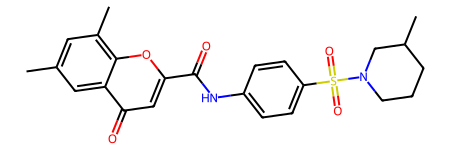

In [ ]:
molecula0= Chem.MolFromSmiles(filtrado["Smiles"][0])
molecula0

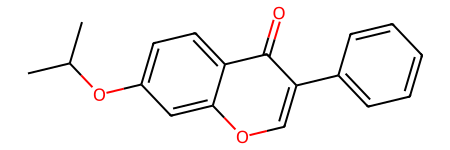

In [ ]:
molecula2=Chem.MolFromSmiles(filtrado["Smiles"][2])
molecula2

,ChEMBL ID,Molecular Weight,Targets,Smiles,AlogP,HBA (Lipinski),HBD (Lipinski),Inchi Key,ROMol
0,CHEMBL1534871,454.55,8.0,Cc1cc(C)c2oc(C(=O)Nc3ccc(S(=O)(=O)N4CCCC(C)C4)...,4.08,7.0,1.0,DQBUPBQECIMBQP-UHFFFAOYSA-N,
2,CHEMBL165790,280.32,158.0,CC(C)Oc1ccc2c(=O)c(-c3ccccc3)coc2c1,4.25,3.0,0.0,SFBODOKJTYAUCM-UHFFFAOYSA-N,
3,CHEMBL1574883,366.37,11.0,COc1ccc2c(=O)c3c(=O)n(Cc4ccco4)c(C(C)C)nc3oc2c1,3.28,7.0,0.0,GZPJMVWCLLSMGU-UHFFFAOYSA-N,
4,CHEMBL4804017,470.52,NaN,CN(C)CCOc1ccc(-c2cc(=O)c3c(O)cc(OCCCCCC(=O)NO)...,3.55,9.0,3.0,MVVFMQBQTUASSH-UHFFFAOYSA-N,
5,CHEMBL3814841,479.61,7.0,CC(C)(C)c1ccc2occ(/C=N/Nc3nc4c(c(N5CCOCC5)n3)C...,3.95,8.0,1.0,XPIQNFBYYUFNNR-LGJNPRDNSA-N,
...,...,...,...,...,...,...,...,...,...
17939,CHEMBL4455163,493.54,3.0,CN(C)c1ccc(C(=O)Nc2cccc(NS(=O)(=O)COc3ccc4c(=O...,3.89,9.0,2.0,QMERQFWNSUWTJZ-UHFFFAOYSA-N,
17940,CHEMBL310188,444.40,56.0,O=c1c(C(c2ccccc2)c2c(O)oc3cc(O)ccc3c2=O)c(O)oc...,3.90,8.0,4.0,ODCQPRXPYQBGAL-UHFFFAOYSA-N,
17941,CHEMBL3210229,297.29,4.0,Cc1ccc(F)c(/N=C/c2c(O)oc3ccccc3c2=O)c1,3.70,4.0,1.0,KSAFKTYIEPYRRB-DJKKODMXSA-N,
17942,CHEMBL4224907,477.49,1.0,COc1c(NS(=O)(=O)c2ccc3ccccc3c2)cc2oc3cccc(OC)c...,4.62,8.0,2.0,PSAGQSNNEAMDSV-UHFFFAOYSA-N,

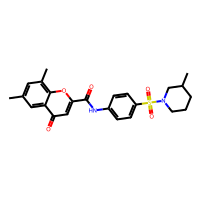
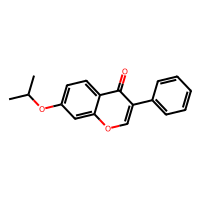
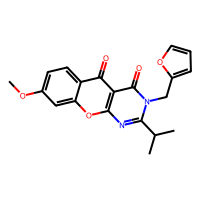
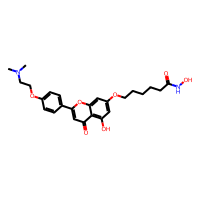
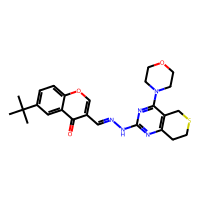
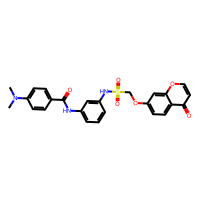
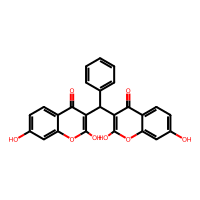
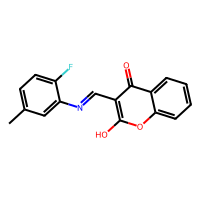
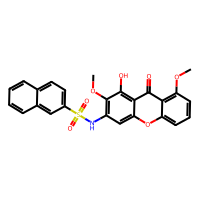
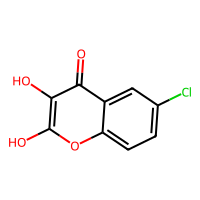

In [ ]:
PandasTools.AddMoleculeColumnToFrame(filtrado, smilesCol='Smiles')

filtrado

Compuestos que tienen 0 targets

/usr/local/lib/python3.10/dist-packages/rdkit/Chem/PandasTools.py:371: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,ChEMBL ID,Molecular Weight,Targets,Smiles,AlogP,HBA (Lipinski),HBD (Lipinski),Inchi Key,ROMol
4,CHEMBL4804017,470.52,NaN,CN(C)CCOc1ccc(-c2cc(=O)c3c(O)cc(OCCCCCC(=O)NO)...,3.55,9.0,3.0,MVVFMQBQTUASSH-UHFFFAOYSA-N,
125,CHEMBL4300907,428.53,NaN,COc1c(-c2ccc(-c3ccccc3)cc2)oc2c(CNCCCCN)cccc2c1=O,4.96,5.0,3.0,RWZOKORRKAHVQJ-UHFFFAOYSA-N,
170,CHEMBL3306448,340.33,NaN,O=C(O)c1cc(=O)c2ccc(OCCCOc3ccccc3)cc2o1,3.34,6.0,1.0,VMEKKDVMVOQEIT-UHFFFAOYSA-N,
246,CHEMBL4595037,368.37,NaN,O=c1c(O)c(-c2ccccc2)oc2cc3c(S(=O)(=O)O)cccc3cc12,3.57,6.0,2.0,IBSPPJGLHFKRDB-UHFFFAOYSA-N,
301,CHEMBL4597406,246.27,NaN,CN(C)C(=O)c1ccc2oc(CN)cc(=O)c2c1,0.95,5.0,2.0,VAXQXKKNZLBUTJ-UHFFFAOYSA-N,
...,...,...,...,...,...,...,...,...,...
17684,CHEMBL3594519,429.43,NaN,COc1c(-c2ccc(O)c(O)c2)oc2cc(O)cc(OCCN3CCOCC3)c...,2.30,9.0,3.0,CZTNZBPCZFHUSU-UHFFFAOYSA-N,
17685,CHEMBL4597324,414.51,NaN,COc1ccc2c(=O)c3cccc(CN4CCN(Cc5ccccc5)CC4)c3oc2c1,4.27,5.0,0.0,OVPQMGNGMYAMQF-UHFFFAOYSA-N,
17781,CHEMBL3306921,374.30,NaN,CCCc1c2oc(C(=O)O)cc(=O)c2c(OC)c2c(=O)cc(C(=O)O...,2.26,9.0,2.0,WDYLFDVNBILMCA-UHFFFAOYSA-N,
17804,CHEMBL4300652,486.33,NaN,O=C1/C(=N\N=C\c2coc3ccccc3c2=O)c2ccccc2N1Cc1cc...,4.93,6.0,0.0,JZLAMMOBOLDFIG-YAMSDLRVSA-N,

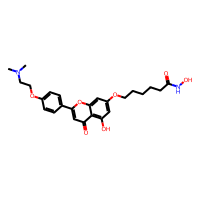
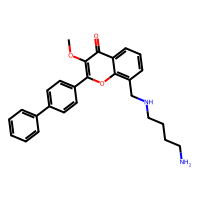
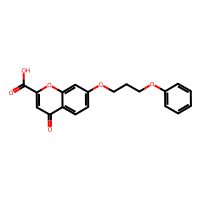
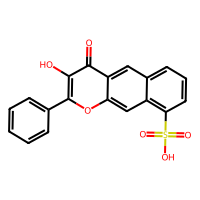
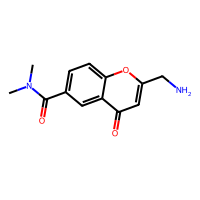
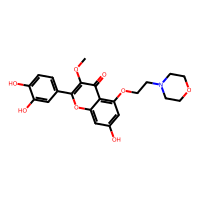
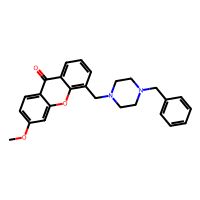
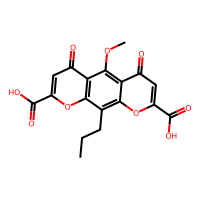
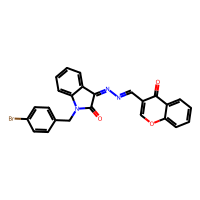
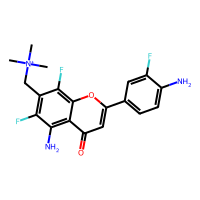

In [ ]:
targets0= filtrado[filtrado["Targets"].isnull()] #COMPOUNDS WITHOUT TARGET PROTEIN
PandasTools.AddMoleculeColumnToFrame(targets0, smilesCol='Smiles')
targets0

Compuestos que tienen mas de un target

/usr/local/lib/python3.10/dist-packages/rdkit/Chem/PandasTools.py:371: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,ChEMBL ID,Molecular Weight,Targets,Smiles,AlogP,HBA (Lipinski),HBD (Lipinski),Inchi Key,ROMol
0,CHEMBL1534871,454.55,8.0,Cc1cc(C)c2oc(C(=O)Nc3ccc(S(=O)(=O)N4CCCC(C)C4)...,4.08,7.0,1.0,DQBUPBQECIMBQP-UHFFFAOYSA-N,
2,CHEMBL165790,280.32,158.0,CC(C)Oc1ccc2c(=O)c(-c3ccccc3)coc2c1,4.25,3.0,0.0,SFBODOKJTYAUCM-UHFFFAOYSA-N,
3,CHEMBL1574883,366.37,11.0,COc1ccc2c(=O)c3c(=O)n(Cc4ccco4)c(C(C)C)nc3oc2c1,3.28,7.0,0.0,GZPJMVWCLLSMGU-UHFFFAOYSA-N,
5,CHEMBL3814841,479.61,7.0,CC(C)(C)c1ccc2occ(/C=N/Nc3nc4c(c(N5CCOCC5)n3)C...,3.95,8.0,1.0,XPIQNFBYYUFNNR-LGJNPRDNSA-N,
6,CHEMBL2392150,323.30,4.0,O=C(Cc1ccccc1)Nc1cccc2c(=O)cc(C(=O)O)oc12,2.67,6.0,2.0,CINUWZRGRGQLJV-UHFFFAOYSA-N,
...,...,...,...,...,...,...,...,...,...
17939,CHEMBL4455163,493.54,3.0,CN(C)c1ccc(C(=O)Nc2cccc(NS(=O)(=O)COc3ccc4c(=O...,3.89,9.0,2.0,QMERQFWNSUWTJZ-UHFFFAOYSA-N,
17940,CHEMBL310188,444.40,56.0,O=c1c(C(c2ccccc2)c2c(O)oc3cc(O)ccc3c2=O)c(O)oc...,3.90,8.0,4.0,ODCQPRXPYQBGAL-UHFFFAOYSA-N,
17941,CHEMBL3210229,297.29,4.0,Cc1ccc(F)c(/N=C/c2c(O)oc3ccccc3c2=O)c1,3.70,4.0,1.0,KSAFKTYIEPYRRB-DJKKODMXSA-N,
17942,CHEMBL4224907,477.49,1.0,COc1c(NS(=O)(=O)c2ccc3ccccc3c2)cc2oc3cccc(OC)c...,4.62,8.0,2.0,PSAGQSNNEAMDSV-UHFFFAOYSA-N,

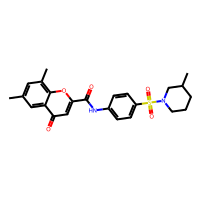
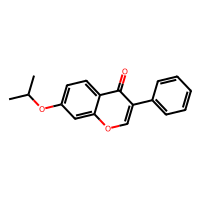
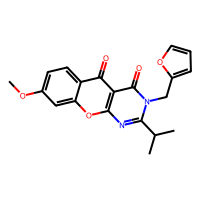
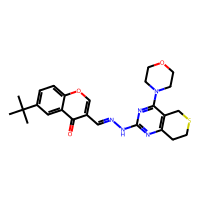
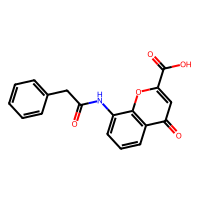
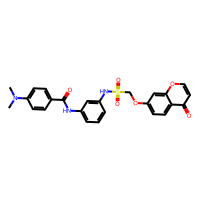
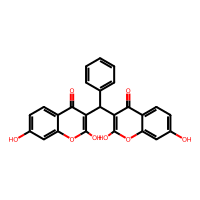
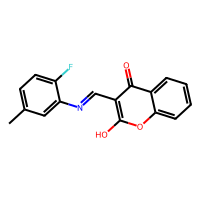
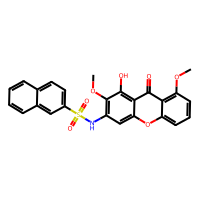
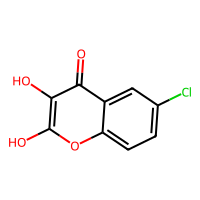

In [ ]:
targets1= filtrado[filtrado["Targets"]>=1] #FILTER OF COMPOUNDS WHO HAVE MORE THAN ONE TARGET PROTEIN
PandasTools.AddMoleculeColumnToFrame(targets1, smilesCol='Smiles')
targets1

In [ ]:
targets1.Targets.mean()

6.670324560587743

<Axes: ylabel='Frequency'>

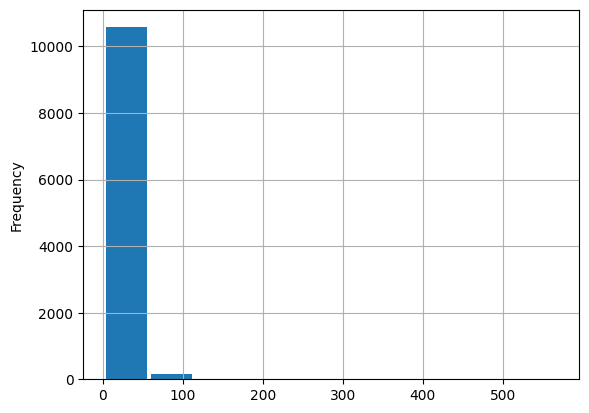

In [ ]:
targets1["Targets"].plot.hist(grid=True, bins=10, rwidth=0.9)

In [ ]:
#A MAXIMUM OF 4 TARGETS WAS CONSIDERED OPTIMAL FOR SEARCHING POTENCIAL COMPOUNDS

In [ ]:
Targets= targets1[targets1["Targets"]==4]
Targets

,ChEMBL ID,Molecular Weight,Targets,Smiles,AlogP,HBA (Lipinski),HBD (Lipinski),Inchi Key,ROMol
6,CHEMBL2392150,323.30,4.0,O=C(Cc1ccccc1)Nc1cccc2c(=O)cc(C(=O)O)oc12,2.67,6.0,2.0,CINUWZRGRGQLJV-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edac24ab20>
24,CHEMBL512767,374.35,4.0,COc1c(OC)c(O)c2c(=O)c(OC)c(-c3ccc(O)cc3)oc2c1OC,2.91,8.0,2.0,PIUSRRUXGNYCSS-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edac24b220>
25,CHEMBL1706966,389.41,4.0,Cc1ccc2c(=O)cc(C(=O)Nc3c(C)n(C)n(-c4ccccc4)c3=...,3.15,7.0,1.0,LRGYRTXMVGXATM-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edac24b290>
28,CHEMBL5183467,333.32,4.0,O=C(Nc1ccc2c(=O)c3cccc(F)c3oc2c1)c1ccccc1,4.34,4.0,1.0,KGUADSZNPOHRBA-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edac24b3e0>
59,CHEMBL5170913,464.91,4.0,O=c1cc(-c2ccc(N3CCN(c4cccc(Cl)c4)CC3)cc2)oc2cc...,4.56,7.0,3.0,ASJNXRZYQGOQLO-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edac24bd80>
...,...,...,...,...,...,...,...,...,...
17883,CHEMBL4789265,320.34,4.0,COC(=O)CCCCc1cc(=O)c2c(OC)cc(OC)cc2o1,2.70,6.0,0.0,JABBUGZGEVJIJX-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edaa9767a0>
17897,CHEMBL373184,356.40,4.0,NS(=O)(=O)c1ccc(CC/N=C/c2coc3ccccc3c2=O)cc1,2.10,6.0,2.0,AKOZVEYKBWJJAE-RGVLZGJSSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edaa976ab0>
17917,CHEMBL4217918,456.51,4.0,COc1c(OCCCCN2CCN(C)CC2)cc(O)c2c(=O)cc(-c3ccc(F...,3.72,7.0,1.0,BSSFWXSFAJETPM-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edaa976ea0>
17928,CHEMBL4751787,292.29,4.0,COC(=O)CCc1cc(=O)c2c(OC)cc(OC)cc2o1,1.92,6.0,0.0,DOFIBTBWUABZBN-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edaa9770d0>


<Axes: ylabel='Frequency'>

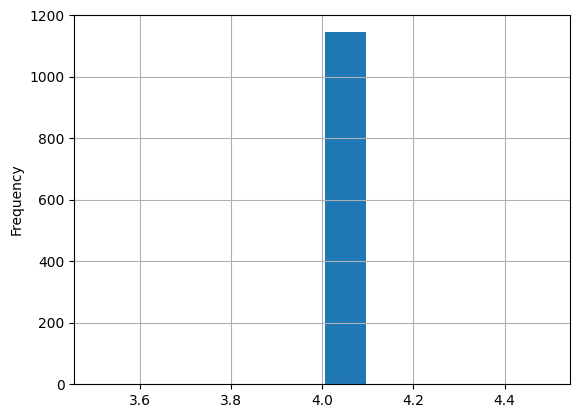

In [ ]:
#buscar cuales son los targets
Targets["Targets"].plot.hist(grid=True, bins=10, rwidth=0.9)


PROPIEDADES FISICOQUIMICAS PERO USANDO LA FUNCION CREADA EN LA GUIA DEL CURSO

In [ ]:
# Llamar a la función drug_likness_decriptors pasando el DataFrame tabla_CHEMBL674637 como argumento
propiedadesfq = drug_likness_decriptors(Targets)
propiedadesfq

,ChEMBL ID,Molecular Weight,Targets,Smiles,AlogP,HBA (Lipinski),HBD (Lipinski),Inchi Key,ROMol,HBD,HBA,MW,logP,nRotB
6,CHEMBL2392150,323.30,4.0,O=C(Cc1ccccc1)Nc1cccc2c(=O)cc(C(=O)O)oc12,2.67,6.0,2.0,CINUWZRGRGQLJV-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edac24ab20>,2,4,323.079373,2.67240,4
24,CHEMBL512767,374.35,4.0,COc1c(OC)c(O)c2c(=O)c(OC)c(-c3ccc(O)cc3)oc2c1OC,2.91,8.0,2.0,PIUSRRUXGNYCSS-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edac24b220>,2,8,374.100168,2.90560,5
25,CHEMBL1706966,389.41,4.0,Cc1ccc2c(=O)cc(C(=O)Nc3c(C)n(C)n(-c4ccccc4)c3=...,3.15,7.0,1.0,LRGYRTXMVGXATM-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edac24b290>,1,6,389.137556,3.15154,3
28,CHEMBL5183467,333.32,4.0,O=C(Nc1ccc2c(=O)c3cccc(F)c3oc2c1)c1ccccc1,4.34,4.0,1.0,KGUADSZNPOHRBA-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edac24b3e0>,1,3,333.080121,4.33760,2
59,CHEMBL5170913,464.91,4.0,O=c1cc(-c2ccc(N3CCN(c4cccc(Cl)c4)CC3)cc2)oc2cc...,4.56,7.0,3.0,ASJNXRZYQGOQLO-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edac24bd80>,3,7,464.113899,4.55680,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17883,CHEMBL4789265,320.34,4.0,COC(=O)CCCCc1cc(=O)c2c(OC)cc(OC)cc2o1,2.70,6.0,0.0,JABBUGZGEVJIJX-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edaa9767a0>,0,6,320.125988,2.69600,7
17897,CHEMBL373184,356.40,4.0,NS(=O)(=O)c1ccc(CC/N=C/c2coc3ccccc3c2=O)cc1,2.10,6.0,2.0,AKOZVEYKBWJJAE-RGVLZGJSSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edaa976ab0>,1,5,356.083078,2.10200,5
17917,CHEMBL4217918,456.51,4.0,COc1c(OCCCCN2CCN(C)CC2)cc(O)c2c(=O)cc(-c3ccc(F...,3.72,7.0,1.0,BSSFWXSFAJETPM-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edaa976ea0>,1,7,456.206050,3.71970,8
17928,CHEMBL4751787,292.29,4.0,COC(=O)CCc1cc(=O)c2c(OC)cc(OC)cc2o1,1.92,6.0,0.0,DOFIBTBWUABZBN-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x78edaa9770d0>,0,6,292.094688,1.91580,5


#physicochemical properties

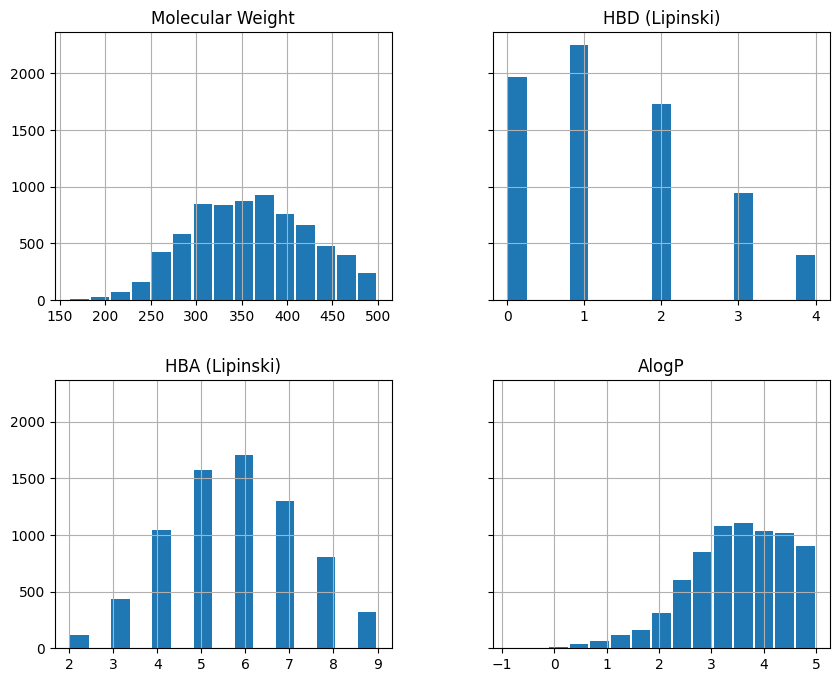

In [ ]:
import matplotlib.pyplot as plt

# Crear un histograma de las columnas 'MW', 'HBD', 'HBA' y 'logP'
Targets[['Molecular Weight', 'HBD (Lipinski)', "HBA (Lipinski)", 'AlogP']].hist(
    bins=15,
    figsize=(10, 8),
    rwidth=0.9,
    sharey=True
)
plt.rcParams['axes.axisbelow']=True

# Guardar el gráfico como un archivo JPG
plt.savefig("plt_histogramas.jpg")

# Mostrar el gráfico en la salida
plt.show()


#Targets activity


ejemplo de la actividad del target de 1 solo compuesto


In [ ]:
#Pruebo con el ID de 1 compuesto:
ChEMBLID = "CHEMBL1534871"

#Obtengo los datos de activdad de ese compuesto
activities = new_client.activity.filter(molecule_chembl_id__in=ChEMBLID)

#Obtengo los mismos datos pero le agrego un filtro para elegir algunas entradas
activities = new_client.activity.filter(molecule_chembl_id__in=ChEMBLID).only(['target_chembl_id', "target_organism",'activity_comment', 'target_pref_name', 'parent_molecule_chembl_id' ## Specify which fields (columns) to extract
                                                               ,'molecule_chembl_id','molecule_pref_name', 'pchembl_value'])

#Armo un data frame con los datos
act_df = pd.DataFrame(activities)
act_df

,activity_comment,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,target_chembl_id,target_organism,target_pref_name,value
0,Not Active,CHEMBL1534871,None,CHEMBL1534871,5.30,CHEMBL1293226,Homo sapiens,Lysine-specific demethylase 4D-like,5.0119
1,Inconclusive,CHEMBL1534871,None,CHEMBL1534871,5.20,CHEMBL1293224,Homo sapiens,Microtubule-associated protein tau,6.3096
2,Inconclusive,CHEMBL1534871,None,CHEMBL1534871,4.85,CHEMBL1293224,Homo sapiens,Microtubule-associated protein tau,14.1254
3,Not Active,CHEMBL1534871,None,CHEMBL1534871,4.60,CHEMBL3577,Homo sapiens,Aldehyde dehydrogenase 1A1,25.1189
4,Inconclusive,CHEMBL1534871,None,CHEMBL1534871,5.24,CHEMBL612545,None,Unchecked,5.8048
5,Inconclusive,CHEMBL1534871,None,CHEMBL1534871,6.35,CHEMBL1293224,Homo sapiens,Microtubule-associated protein tau,0.4467
6,inconclusive,CHEMBL1534871,None,CHEMBL1534871,None,CHEMBL1075094,Homo sapiens,Nuclear factor erythroid 2-related factor 2,0.5805
7,inconclusive,CHEMBL1534871,None,CHEMBL1534871,None,CHEMBL1741209,Homo sapiens,ATPase family AAA domain-containing protein 5,23.1093
8,inconclusive,CHEMBL1534871,None,CHEMBL1534871,None,CHEMBL612545,None,Unchecked,1.122
9,inconclusive,CHEMBL1534871,None,CHEMBL1534871,None,CHEMBL612545,None,Unchecked,31.6228


# Obtención de targets

In [ ]:
lista_compuestos
targets1= lista_compuestos[lista_compuestos["Targets"]>=1]
targets1

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key
0,CHEMBL1534871,NaN,NaN,Small molecule,NaN,454.55,8.0,13.0,4.08,96.69,...,32,7,1,0,454.1562,-1.49,NEUTRAL,C24H26N2O5S,Cc1cc(C)c2oc(C(=O)Nc3ccc(S(=O)(=O)N4CCCC(C)C4)...,DQBUPBQECIMBQP-UHFFFAOYSA-N
1,CHEMBL2420319,NaN,NaN,Small molecule,NaN,582.73,2.0,3.0,5.24,78.26,...,42,8,1,2,582.2301,-1.09,NEUTRAL,C33H34N4O4S,CN1CCN(CCC(=O)Nc2ccc(-c3cccc4c(=O)cc(N5CCOCC5)...,SECMQIPLSAXOJP-UHFFFAOYSA-N
2,CHEMBL165790,IPRIFLAVONE,7-ISOPROPOXYISOFLAVONE|IPRIFLAVONE|NSC-755888|...,Small molecule,-1.0,280.32,158.0,659.0,4.25,39.44,...,21,3,0,0,280.1099,-0.08,NEUTRAL,C18H16O3,CC(C)Oc1ccc2c(=O)c(-c3ccccc3)coc2c1,SFBODOKJTYAUCM-UHFFFAOYSA-N
3,CHEMBL1574883,NaN,NaN,Small molecule,NaN,366.37,11.0,12.0,3.28,87.47,...,27,7,0,0,366.1216,-0.87,NEUTRAL,C20H18N2O5,COc1ccc2c(=O)c3c(=O)n(Cc4ccco4)c(C(C)C)nc3oc2c1,GZPJMVWCLLSMGU-UHFFFAOYSA-N
5,CHEMBL3814841,NaN,NaN,Small molecule,NaN,479.61,7.0,7.0,3.95,92.85,...,34,8,1,0,479.1991,-1.48,NEUTRAL,C25H29N5O3S,CC(C)(C)c1ccc2occ(/C=N/Nc3nc4c(c(N5CCOCC5)n3)C...,XPIQNFBYYUFNNR-LGJNPRDNSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17941,CHEMBL3210229,NaN,NaN,Small molecule,NaN,297.29,4.0,4.0,3.70,62.80,...,22,4,1,0,297.0801,-0.77,ACID,C17H12FNO3,Cc1ccc(F)c(/N=C/c2c(O)oc3ccccc3c2=O)c1,KSAFKTYIEPYRRB-DJKKODMXSA-N
17942,CHEMBL4224907,NaN,NaN,Small molecule,NaN,477.49,1.0,2.0,4.62,115.07,...,34,8,2,0,477.0882,-0.09,NEUTRAL,C25H19NO7S,COc1c(NS(=O)(=O)c2ccc3ccccc3c2)cc2oc3cccc(OC)c...,PSAGQSNNEAMDSV-UHFFFAOYSA-N
17943,CHEMBL34286,NaN,NaN,Small molecule,NaN,212.59,1.0,12.0,1.86,70.67,...,14,4,2,0,211.9876,0.25,ACID,C9H5ClO4,O=c1c(O)c(O)oc2ccc(Cl)cc12,OUKHBRYSFUWDPR-UHFFFAOYSA-N
17944,CHEMBL3526993,NaN,NaN,Small molecule,NaN,844.72,2.0,3.0,-4.15,363.88,...,59,23,12,3,844.2273,1.49,ACID,C36H44O23,COc1ccc(-c2oc3cc(OCCO)cc(O)c3c(=O)c2O[C@@H]2O[...,RZJFQSHKRKMXIE-DGHKUZIUSA-N


In [ ]:
targets1.Targets.value_counts()

1.0      5233
2.0      2917
3.0      2376
4.0      1907
5.0      1276
         ... 
476.0       1
143.0       1
126.0       1
116.0       1
120.0       1
Name: Targets, Length: 128, dtype: int64

Analisis para ver apartir de que cantidad de targets cortar y filtrar

In [ ]:
df = lista_compuestos[["ChEMBL ID", "Smiles", 'Inchi Key', "Targets", "Bioactivities",'Max Phase']]

In [ ]:
df_filtered = df.loc[(df['Targets']<10)]

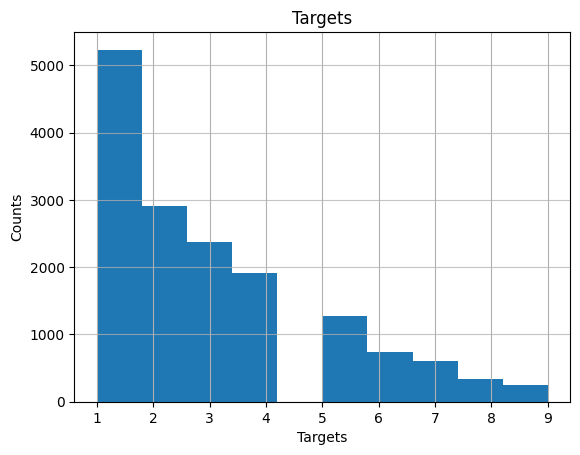

In [ ]:

# Crear un histograma de la columna 'MW' de la tabla_CHEMBL674637 utilizando el método plot.hist()
df_filtered['Targets'].plot.hist(grid=True, bins=10)

# Establecer el título del gráfico como 'MW'
plt.title('Targets')

# Establecer la etiqueta del eje x como 'MW'
plt.xlabel('Targets')

# Establecer la etiqueta del eje y como 'Counts'
plt.ylabel('Counts')

# Activar la cuadrícula en el eje y con un nivel de transparencia de 0.75
plt.grid(axis='y', alpha=0.75)
plt.rcParams['axes.axisbelow']=True

In [ ]:
targets_1=pd.DataFrame()
Targets= targets1[targets1["Targets"]==1]
for j in range(len(Targets)):
  print(j)
  t= Targets["ChEMBL ID"].tolist()
  ChEMBLIDS= t[j]
  activity=new_client.activity.filter(molecule_chembl_id__in=ChEMBLIDS).only(['target_chembl_id', 'target_pref_name',
                                                        'molecule_chembl_id'])
  act_df=pd.DataFrame(activity)
  targets_1 = pd.concat([targets_1 , act_df], ignore_index=True, sort=False)

targets_1.to_csv('targets_1.csv')

In [ ]:
targets_2=pd.DataFrame()
Targets= targets1[targets1["Targets"]==2]
for j in range(len(Targets)):
  print(j)
    t= Targets["ChEMBL ID"].tolist()
    ChEMBLIDS= t[j]
    activity=new_client.activity.filter(molecule_chembl_id__in=ChEMBLIDS).only(['target_chembl_id', 'target_pref_name',
                                                        'molecule_chembl_id'])
    act_df=pd.DataFrame(activity)
    targets_2 = pd.concat([targets_2 , act_df], ignore_index=True, sort=False)

targets_2.to_csv('targets_2.csv')

In [ ]:
targets_3=pd.DataFrame()
Targets= targets1[targets1["Targets"]==3]
for j in range(len(Targets)):
    print(j)
    t= Targets["ChEMBL ID"].tolist()
    ChEMBLIDS= t[j]
    activity=new_client.activity.filter(molecule_chembl_id__in=ChEMBLIDS).only(['target_chembl_id', 'target_pref_name',
                                                        'molecule_chembl_id'])
    act_df=pd.DataFrame(activity)
    targets_3= pd.concat([targets_3 , act_df], ignore_index=True, sort=False)

targets_3.to_csv('targets_3.csv')

In [ ]:
targets_4=pd.DataFrame()
Targets= targets1[targets1["Targets"]==4]
for j in range(len(Targets)):
    print(j)
    t= Targets["ChEMBL ID"].tolist()
    ChEMBLIDS= t[j]
    activity=new_client.activity.filter(molecule_chembl_id__in=ChEMBLIDS).only(['target_chembl_id', 'target_pref_name',
                                                        'molecule_chembl_id'])
    act_df=pd.DataFrame(activity)
    targets_4= pd.concat([targets_4 , act_df], ignore_index=True, sort=False)

targets_4.to_csv('targets_4.csv')

In [ ]:
targets_all=pd.DataFrame()
Targets= targets1
for j in range(len(Targets)):
    print(j)
    t= Targets["ChEMBL ID"].tolist()
    ChEMBLIDS= t[j]
    activity=new_client.activity.filter(molecule_chembl_id__in=ChEMBLIDS).only(['target_chembl_id', 'target_pref_name',
                                                        'molecule_chembl_id'])
    act_df=pd.DataFrame(activity)
    targets_all= pd.concat([targets_all, act_df], ignore_index=True, sort=False)

targets_all.to_csv('targets_all.csv')

In [ ]:
targets_1=pd.DataFrame()
Targets= targets1[targets1["Targets"]==1]
for j in range(len(Targets)):
    t= Targets["ChEMBL ID"].tolist()
    ChEMBLIDS= t[j]
    activity=new_client.activity.filter(molecule_chembl_id__in=ChEMBLIDS).only(['target_chembl_id', 'target_pref_name',
                                                        'molecule_chembl_id'])
    act_df=pd.DataFrame(activity)
    targets_1 = pd.concat([targets_1 , act_df], ignore_index=True, sort=False)

targets_2=pd.DataFrame()
Targets= targets1[targets1["Targets"]==2]
for j in range(len(Targets)):
    t= Targets["ChEMBL ID"].tolist()
    ChEMBLIDS= t[j]
    activity=new_client.activity.filter(molecule_chembl_id__in=ChEMBLIDS).only(['target_chembl_id', 'target_pref_name',
                                                        'molecule_chembl_id'])
    act_df=pd.DataFrame(activity)
    targets_2 = pd.concat([targets_2 , act_df], ignore_index=True, sort=False)

targets_3=pd.DataFrame()
Targets= targets1[targets1["Targets"]==3]
for j in range(len(Targets)):
    t= Targets["ChEMBL ID"].tolist()
    ChEMBLIDS= t[j]
    activity=new_client.activity.filter(molecule_chembl_id__in=ChEMBLIDS).only(['target_chembl_id', 'target_pref_name',
                                                        'molecule_chembl_id'])
    act_df=pd.DataFrame(activity)
    targets_3= pd.concat([targets_3 , act_df], ignore_index=True, sort=False)

targets_4=pd.DataFrame()
Targets= targets1[targets1["Targets"]==4]
for j in range(len(Targets)):
    t= Targets["ChEMBL ID"].tolist()
    ChEMBLIDS= t[j]
    activity=new_client.activity.filter(molecule_chembl_id__in=ChEMBLIDS).only(['target_chembl_id', 'target_pref_name',
                                                        'molecule_chembl_id'])
    act_df=pd.DataFrame(activity)
    targets_4= pd.concat([targets_4 , act_df], ignore_index=True, sort=False)

#compuestos con solo 4 targets info de su actividad

In [ ]:
targets_1 = pd.read_csv('targets_1.csv',sep=',')
targets_2=pd.read_csv('targets_2.csv',sep=',')
targets_3=pd.read_csv('targets_3.csv',sep=',')
targets_4=pd.read_csv('targets_4.csv',sep=',')

In [ ]:
targets_tot=pd.concat([targets_1,targets_2,targets_3,targets_4], ignore_index=True, sort=False)
targets_tot
#no use targets all porque creo que son todos los compuestos que tienen >=1 target
#por eso concatene estos 4

,Unnamed: 0,molecule_chembl_id,target_chembl_id,target_pref_name
0,0,CHEMBL5189592,CHEMBL612545,Unchecked
1,1,CHEMBL2442405,CHEMBL2095191,Casein kinase II
2,2,CHEMBL2442405,CHEMBL2095191,Casein kinase II
3,3,CHEMBL5176747,CHEMBL352,Staphylococcus aureus
4,4,CHEMBL5195457,CHEMBL614069,A-431
...,...,...,...,...
43093,12185,CHEMBL4104900,CHEMBL352,Staphylococcus aureus
43094,12186,CHEMBL3210229,CHEMBL612545,Unchecked
43095,12187,CHEMBL3210229,CHEMBL1741209,ATPase family AAA domain-containing protein 5
43096,12188,CHEMBL3210229,CHEMBL364,Plasmodium falciparum


In [ ]:
#targets_lys= targets_tot[targets_tot["target_pref_name"].str.contains("lysine",case=False)]
#print(len(targets_lys))
targets_pls=targets_tot[targets_tot["target_pref_name"].str.contains("plasmodium",case=False)]
print(len(targets_pls))
targets_tryp=targets_tot[targets_tot["target_pref_name"].str.contains("trypanosoma",case=False)]
print(len(targets_tryp))
targets_leish=targets_tot[targets_tot["target_pref_name"].str.contains("leishmania",case=False)]
print(len(targets_leish))

458
106
219


##Lista solo de tryps(agregandole not detected, not toxic)

In [ ]:
targets_tryp=targets_tot[targets_tot["target_pref_name"].str.contains("trypanosoma",case=False)]
targets_tryp


,Unnamed: 0,molecule_chembl_id,target_chembl_id,target_pref_name
4795,4795,CHEMBL54466,CHEMBL368,Trypanosoma cruzi
6128,6128,CHEMBL481243,CHEMBL368,Trypanosoma cruzi
6283,6283,CHEMBL2094415,CHEMBL612851,Trypanosoma brucei brucei
7060,7060,CHEMBL54568,CHEMBL368,Trypanosoma cruzi
8907,8907,CHEMBL4459773,CHEMBL612851,Trypanosoma brucei brucei
...,...,...,...,...
39945,9037,CHEMBL1774173,CHEMBL368,Trypanosoma cruzi
39946,9038,CHEMBL1774173,CHEMBL368,Trypanosoma cruzi
40524,9616,CHEMBL497046,CHEMBL368,Trypanosoma cruzi
40677,9769,CHEMBL449682,CHEMBL368,Trypanosoma cruzi


In [ ]:
tryp_targets_activity=pd.DataFrame()
for i in range(len(targets_tryp)):
 tl=targets_tryp["molecule_chembl_id"].tolist()
 ChEMBLID=tl[i]
 activitiesll= new_client.activity.filter(molecule_chembl_id__in= ChEMBLID).only(['target_chembl_id', 'target_pref_name',
                                                        'molecule_chembl_id',"activity_comment"])
 act_df=pd.DataFrame(activitiesll)
 tryp_targets_activity=pd.concat([tryp_targets_activity,act_df], ignore_index=True, sort=False)

In [ ]:
tryp_targets_activity

,activity_comment,molecule_chembl_id,target_chembl_id,target_pref_name
0,None,CHEMBL54466,CHEMBL368,Trypanosoma cruzi
1,None,CHEMBL481243,CHEMBL368,Trypanosoma cruzi
2,None,CHEMBL2094415,CHEMBL612851,Trypanosoma brucei brucei
3,None,CHEMBL54568,CHEMBL368,Trypanosoma cruzi
4,None,CHEMBL4459773,CHEMBL612851,Trypanosoma brucei brucei
...,...,...,...,...
1072,Not Active,CHEMBL449682,CHEMBL368,Trypanosoma cruzi
1073,None,CHEMBL491160,CHEMBL367,Leishmania donovani
1074,None,CHEMBL491160,CHEMBL612851,Trypanosoma brucei brucei
1075,Not Determined,CHEMBL491160,CHEMBL391,Vero


In [ ]:
tryp_targets_activity["activity_comment"].value_counts()

Active            449
Non-toxic          71
Not Active         22
Non-Toxic          14
Not Determined      8
272309              1
Name: activity_comment, dtype: int64

In [ ]:
targets_tryp_actividad=tryp_targets_activity[tryp_targets_activity["target_pref_name"].str.contains("trypanosoma",case=False)]
targets_tryp_actividad

,activity_comment,molecule_chembl_id,target_chembl_id,target_pref_name
0,None,CHEMBL54466,CHEMBL368,Trypanosoma cruzi
1,None,CHEMBL481243,CHEMBL368,Trypanosoma cruzi
2,None,CHEMBL2094415,CHEMBL612851,Trypanosoma brucei brucei
3,None,CHEMBL54568,CHEMBL368,Trypanosoma cruzi
4,None,CHEMBL4459773,CHEMBL612851,Trypanosoma brucei brucei
...,...,...,...,...
1062,Active,CHEMBL1774173,CHEMBL368,Trypanosoma cruzi
1063,Active,CHEMBL1774173,CHEMBL368,Trypanosoma cruzi
1068,Not Active,CHEMBL497046,CHEMBL368,Trypanosoma cruzi
1072,Not Active,CHEMBL449682,CHEMBL368,Trypanosoma cruzi


In [ ]:
targets_tryp_actividad["activity_comment"].value_counts()

Active        449
Not Active      4
Name: activity_comment, dtype: int64

##compuestos con targets en  3 organismos(agregandole not detected, not toxic)

In [ ]:
targets_filtrados=pd.concat([targets_pls,targets_tryp,targets_leish],ignore_index=True, sort=False)
targets_filtrados

,Unnamed: 0,molecule_chembl_id,target_chembl_id,target_pref_name
0,387,CHEMBL601198,CHEMBL364,Plasmodium falciparum
1,388,CHEMBL601198,CHEMBL364,Plasmodium falciparum
2,459,CHEMBL590681,CHEMBL364,Plasmodium falciparum
3,460,CHEMBL590681,CHEMBL364,Plasmodium falciparum
4,1421,CHEMBL590702,CHEMBL364,Plasmodium falciparum
...,...,...,...,...
778,10785,CHEMBL558735,CHEMBL367,Leishmania donovani
779,10786,CHEMBL558735,CHEMBL367,Leishmania donovani
780,11481,CHEMBL555939,CHEMBL367,Leishmania donovani
781,11482,CHEMBL555939,CHEMBL367,Leishmania donovani


Al pedirle la actividad del target del compuesto tambien se agregan las actividades del compeusto en otros targets

In [ ]:
targets_activity=pd.DataFrame()
for i in range(len(targets_filtrados)):
 tl=targets_filtrados["molecule_chembl_id"].tolist()
 ChEMBLID=tl[i]
 activitiesll= new_client.activity.filter(molecule_chembl_id__in= ChEMBLID).only(['target_chembl_id', 'target_pref_name',
                                                        'molecule_chembl_id',"activity_comment"])
 act_dfll=pd.DataFrame(activitiesll)
 targets_activity=pd.concat([targets_activity,act_dfll], ignore_index=True, sort=False)
targets_activity #son los compuestos y agrega la actividad en cada target que actua
#peor agrega otros organismos o targets xq actuan ahii tambien
#deberia hacer un filtrado denuevo sobre solo los compuestos que me importan
#quiero los mismos pero agregarles la actividad
#osea medio ridiculo haberlos filrado antes xq ahora lso tengo que filrar denuevo

,activity_comment,molecule_chembl_id,target_chembl_id,target_pref_name
0,None,CHEMBL601198,CHEMBL364,Plasmodium falciparum
1,None,CHEMBL601198,CHEMBL364,Plasmodium falciparum
2,None,CHEMBL601198,CHEMBL364,Plasmodium falciparum
3,None,CHEMBL601198,CHEMBL364,Plasmodium falciparum
4,None,CHEMBL590681,CHEMBL364,Plasmodium falciparum
...,...,...,...,...
5560,Active,CHEMBL555939,CHEMBL3004,Multidrug resistance-associated protein 1
5561,None,CHEMBL555939,CHEMBL367,Leishmania donovani
5562,None,CHEMBL555939,CHEMBL367,Leishmania donovani
5563,None,CHEMBL555939,CHEMBL367,Leishmania donovani


In [ ]:
targets_pls2=targets_activity[targets_activity["target_pref_name"].str.contains("plasmodium",case=False)]
print(len(targets_pls2))
targets_tryp2=targets_activity[targets_activity["target_pref_name"].str.contains("trypanosoma",case=False)]
print(len(targets_tryp2))
targets_leish2=targets_activity[targets_activity["target_pref_name"].str.contains("leishmania",case=False)]
print(len(targets_leish2))

1149
795
1623


In [ ]:
targets_denuevo=pd.concat([targets_pls2,targets_tryp2,targets_leish2],ignore_index=True, sort=False)

<Axes: xlabel='count', ylabel='activity_comment'>

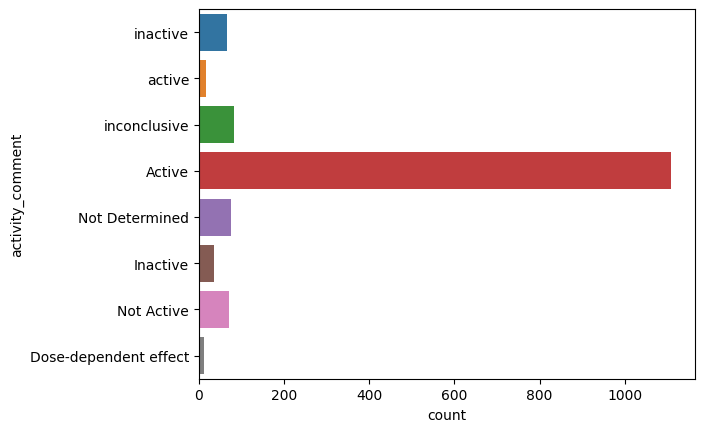

In [ ]:
sns.countplot(data=targets_denuevo, y="activity_comment")

In [ ]:
for i in range(len(targets_denuevo)):
  if targets_denuevo["activity_comment"][i]== "Active":
   targets_denuevo["activity_comment"][i]="Active"
  elif targets_denuevo["activity_comment"][i]== "active":
   targets_denuevo["activity_comment"][i]="Active"
  elif targets_denuevo["activity_comment"][i]== "Inactive":
   targets_denuevo["activity_comment"][i]="Inactive"
  elif targets_denuevo["activity_comment"][i]== "inactive":
   targets_denuevo["activity_comment"][i]="Inactive"
  elif targets_denuevo["activity_comment"][i]== "Not Active":
   targets_denuevo["activity_comment"][i]="Inactive"
  elif targets_denuevo["activity_comment"][i]=="inconclusive":
   targets_denuevo["activity_comment"][i]="Inactive"

In [ ]:
targets_denuevo["activity_comment"].value_counts()

Active                   1127
Inactive                  255
Not Determined             75
Dose-dependent effect      12
Name: activity_comment, dtype: int64

<Axes: xlabel='count', ylabel='activity_comment'>

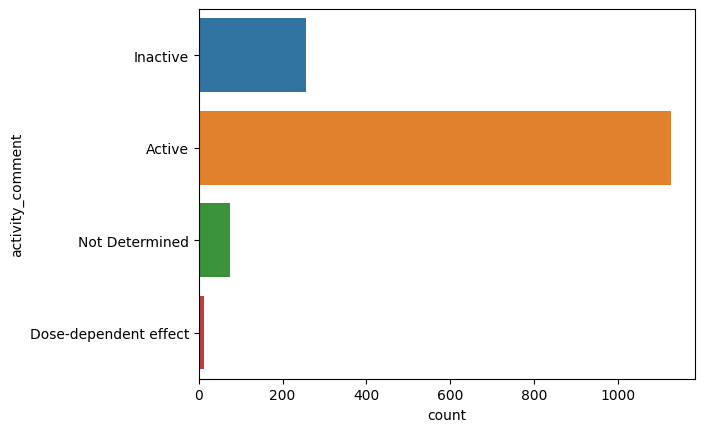

In [ ]:
sns.countplot(data=targets_denuevo, y="activity_comment")

In [ ]:
len(targets_denuevo["molecule_chembl_id"].unique())

334

In [ ]:
targets_denuevo=targets_denuevo.drop_duplicates(subset=["molecule_chembl_id"],keep="first")

In [ ]:
targets_denuevo["activity_comment"].value_counts()


Inactive                 83
Not Determined           17
Active                   11
Dose-dependent effect     1
Name: activity_comment, dtype: int64

In [ ]:
targets_denuevo.columns

Index(['activity_comment', 'molecule_chembl_id', 'target_chembl_id',
       'target_pref_name'],
      dtype='object')

In [ ]:
ChEMBLID= targets_denuevo.molecule_chembl_id.unique().tolist()
Comment= targets_denuevo["activity_comment"].tolist()

In [ ]:
df=pd.DataFrame()
df["ChEMBL ID"]= ChEMBLID
df["Comment"]= Comment

In [ ]:
compuestos=pd.merge(df["ChEMBL ID"],lista_compuestos,on="ChEMBL ID", how='inner')

In [ ]:
compuestos["Comment"]=Comment

In [ ]:
compuestos.to_csv("entrenamiento_tryp2.csv")

In [ ]:
df.to_csv("entrenamiento_tryp.csv")

<Axes: xlabel='count', ylabel='activity_comment'>

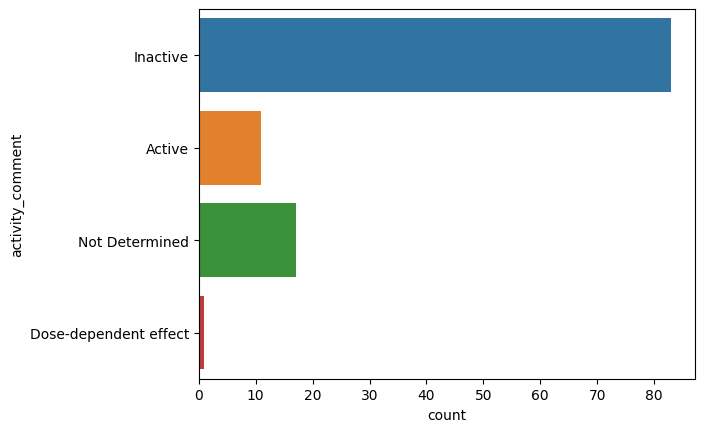

In [ ]:
sns.countplot(data=targets_denuevo, y="activity_comment")

<Axes: xlabel='count', ylabel='activity_comment'>

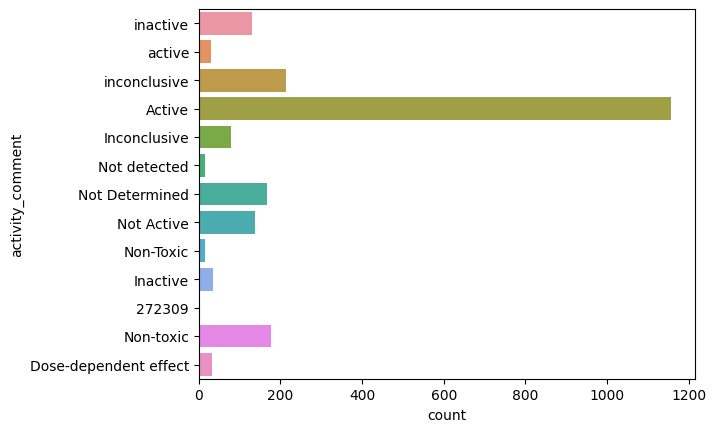

In [ ]:
# Crear un histograma de la columna 'MW' de la tabla_CHEMBL674637 utilizando el método plot.hist()
sns.countplot(data=targets_activity, y="activity_comment")

In [ ]:
for i in range(len(targets_activity))

In [ ]:
targets_activity = targets_activity.dropna()

In [ ]:
targets_active=targets_activity[targets_activity["activity_comment"].str.contains("active",case=False)]
print(len(targets_active))
targets_active["activity_comment"].unique()

1491


array(['inactive', 'active', 'Active', 'Not Active', 'Inactive'],
      dtype=object)

<Axes: xlabel='count', ylabel='activity_comment'>

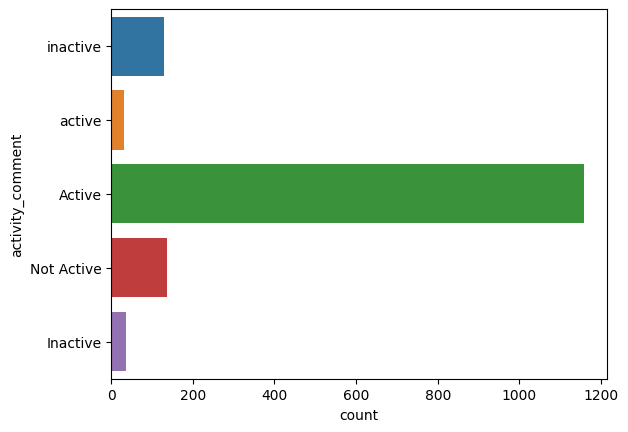

In [ ]:
# Crear un histograma de la columna 'MW' de la tabla_CHEMBL674637 utilizando el método plot.hist()
sns.countplot(data=targets_active, y="activity_comment")

In [ ]:
#targets_lys= targets_tot[targets_tot["target_pref_name"].str.contains("lysine",case=False)]
#print(len(targets_lys))
targets_pls2=targets_active[targets_active["target_pref_name"].str.contains("plasmodium",case=False)]
print(len(targets_pls2))
targets_tryp2=targets_active[targets_active["target_pref_name"].str.contains("trypanosoma",case=False)]
print(len(targets_tryp2))
targets_leish2=targets_active[targets_active["target_pref_name"].str.contains("leishmania",case=False)]
print(len(targets_leish2))

125
461
713


AHORA SI, ACTIVIDAD DE LOS COMPUESTOS EN LOS TARGETS DE SOLO 3 ORGANISMOS

In [ ]:
targets_filtrados2=pd.concat([targets_pls2,targets_tryp2,targets_leish2],ignore_index=True, sort=False)
targets_filtrados2 #son los compuestos activos/inactivos pero solo de los 3 organismos

,activity_comment,molecule_chembl_id,target_chembl_id,target_pref_name
0,inactive,CHEMBL1895603,CHEMBL364,Plasmodium falciparum
1,inactive,CHEMBL1901955,CHEMBL364,Plasmodium falciparum
2,inactive,CHEMBL1892415,CHEMBL364,Plasmodium falciparum
3,inactive,CHEMBL1892415,CHEMBL364,Plasmodium falciparum
4,inactive,CHEMBL1892415,CHEMBL364,Plasmodium falciparum
...,...,...,...,...
1294,Active,CHEMBL501162,CHEMBL612878,Leishmania braziliensis
1295,Active,CHEMBL501162,CHEMBL612878,Leishmania braziliensis
1296,Not Active,CHEMBL497047,CHEMBL612880,Leishmania mexicana
1297,Not Active,CHEMBL497046,CHEMBL612880,Leishmania mexicana


In [ ]:
print(targets_pls2.activity_comment.unique())
print(targets_tryp2.activity_comment.unique())
print(targets_leish2.activity_comment.unique())


['inactive' 'active' 'Active' 'Inactive']
['Not Active' 'Active']
['Not Active' 'Active']


In [ ]:
targets_tryp_active=pd.DataFrame()
for i in range(len(targets_tryp2)):
 t=targets_tryp2["molecule_chembl_id"].tolist()
 ChEMBLID=t[i]
 activitiest= new_client.activity.filter(molecule_chembl_id__in=ChEMBLID,activity_comment="Active").only(['target_chembl_id', 'target_pref_name',
                                                        'molecule_chembl_id',"activity_comment"])
 act_dft=pd.DataFrame(activitiest)
 targets_tryp_active=pd.concat([targets_tryp_active,act_dft], ignore_index=True, sort=False)
targets_tryp_active
#no entiendo porque habria mas datos ahora

,activity_comment,molecule_chembl_id,target_chembl_id,target_pref_name
0,Active,CHEMBL1774170,CHEMBL368,Trypanosoma cruzi
1,Active,CHEMBL1774170,CHEMBL368,Trypanosoma cruzi
2,Active,CHEMBL1774170,CHEMBL368,Trypanosoma cruzi
3,Active,CHEMBL1774170,CHEMBL368,Trypanosoma cruzi
4,Active,CHEMBL1774170,CHEMBL368,Trypanosoma cruzi
...,...,...,...,...
2970,Active,CHEMBL1774173,CHEMBL368,Trypanosoma cruzi
2971,Active,CHEMBL1774173,CHEMBL368,Trypanosoma cruzi
2972,Active,CHEMBL1774173,CHEMBL368,Trypanosoma cruzi
2973,Active,CHEMBL1774173,CHEMBL368,Trypanosoma cruzi


In [ ]:
targets_tryp_active.molecule_chembl_id.value_counts() #osea que solo hay 7 compuestos en realidad

CHEMBL1774170    768
CHEMBL1774167    768
CHEMBL1774173    539
CHEMBL1774172    225
CHEMBL1774168    225
CHEMBL1774171    225
CHEMBL1774169    225
Name: molecule_chembl_id, dtype: int64

In [ ]:
targets_tryp_active.target_pref_name.value_counts() #aca veo que  desaparecieron todos los de tryp brucei deen ser inacti
#no hago un segundo filtrado xq el uncio target es tryanosoma crzi

Trypanosoma cruzi    2975
Name: target_pref_name, dtype: int64

In [ ]:
targets_leish_active=pd.DataFrame()
for i in range(len(targets_leish2)):
 t=targets_leish2["molecule_chembl_id"].tolist()
 ChEMBLID=t[i]
 activitiest= new_client.activity.filter(molecule_chembl_id__in=ChEMBLID,activity_comment="Active").only(['target_chembl_id', 'target_pref_name',
                                                        'molecule_chembl_id',"activity_comment"])
 act_dft=pd.DataFrame(activitiest)
 targets_leish_active=pd.concat([targets_leish_active,act_dft], ignore_index=True, sort=False)
targets_leish_active

,activity_comment,molecule_chembl_id,target_chembl_id,target_pref_name
0,Active,CHEMBL1256931,CHEMBL612879,Leishmania major
1,Active,CHEMBL1256931,CHEMBL612879,Leishmania major
2,Active,CHEMBL1256931,CHEMBL612879,Leishmania major
3,Active,CHEMBL540456,CHEMBL613215,Leishmania peruviana
4,Active,CHEMBL540456,CHEMBL612878,Leishmania braziliensis
...,...,...,...,...
10074,Active,CHEMBL501162,CHEMBL612878,Leishmania braziliensis
10075,Active,CHEMBL501162,CHEMBL612878,Leishmania braziliensis
10076,Active,CHEMBL501162,CHEMBL612878,Leishmania braziliensis
10077,Active,CHEMBL501162,CHEMBL612878,Leishmania braziliensis


In [ ]:
targets_leish_active.target_pref_name.value_counts()

Leishmania braziliensis    6434
Leishmania peruviana       3642
Leishmania major              3
Name: target_pref_name, dtype: int64

In [ ]:
targets_leish_active.molecule_chembl_id.value_counts() #son solo 3 compuestos

CHEMBL540456     6800
CHEMBL501162     3276
CHEMBL1256931       3
Name: molecule_chembl_id, dtype: int64

In [ ]:
targets_pls_active=pd.DataFrame()
for i in range(len(targets_pls2)):
 t=targets_pls2["molecule_chembl_id"].tolist()
 ChEMBLID=t[i]
 activitiest= new_client.activity.filter(molecule_chembl_id__in=ChEMBLID,activity_comment="Active").only(['target_chembl_id', 'target_pref_name',
                                                        'molecule_chembl_id',"activity_comment"])
 act_dft=pd.DataFrame(activitiest)
 targets_pls_active=pd.concat([targets_pls_active,act_dft], ignore_index=True, sort=False)
targets_pls_active

,activity_comment,molecule_chembl_id,target_chembl_id,target_pref_name
0,Active,CHEMBL3813912,CHEMBL2366922,Plasmodium falciparum 3D7
1,Active,CHEMBL4525888,CHEMBL364,Plasmodium falciparum
2,Active,CHEMBL4525888,CHEMBL364,Plasmodium falciparum
3,Active,CHEMBL4525888,CHEMBL364,Plasmodium falciparum
4,Active,CHEMBL4525888,CHEMBL364,Plasmodium falciparum
5,Active,CHEMBL4525888,CHEMBL364,Plasmodium falciparum
6,Active,CHEMBL4525888,CHEMBL364,Plasmodium falciparum
7,Active,CHEMBL4525888,CHEMBL364,Plasmodium falciparum
8,Active,CHEMBL4525888,CHEMBL364,Plasmodium falciparum
9,Active,CHEMBL1555556,CHEMBL2097170,Voltage-gated N-type calcium channel alpha-1B ...


In [ ]:
targets_pls_active2=pd.DataFrame()
for i in range(len(targets_pls2)):
 t=targets_pls2["molecule_chembl_id"].tolist()
 ChEMBLID=t[i]
 activitiest= new_client.activity.filter(molecule_chembl_id__in=ChEMBLID,activity_comment="active").only(['target_chembl_id', 'target_pref_name',
                                                        'molecule_chembl_id',"activity_comment"])
 act_dft=pd.DataFrame(activitiest)
 targets_pls_active2=pd.concat([targets_pls_active2,act_dft], ignore_index=True, sort=False)
targets_pls_active2

,activity_comment,molecule_chembl_id,target_chembl_id,target_pref_name
0,active,CHEMBL1878333,CHEMBL364,Plasmodium falciparum
1,active,CHEMBL1734466,CHEMBL364,Plasmodium falciparum
2,active,CHEMBL1487933,CHEMBL364,Plasmodium falciparum
3,active,CHEMBL1487933,CHEMBL364,Plasmodium falciparum
4,active,CHEMBL1736532,CHEMBL364,Plasmodium falciparum
5,active,CHEMBL1900694,CHEMBL364,Plasmodium falciparum
6,active,CHEMBL1900694,CHEMBL364,Plasmodium falciparum
7,active,CHEMBL1900694,CHEMBL364,Plasmodium falciparum
8,active,CHEMBL1900694,CHEMBL364,Plasmodium falciparum
9,active,CHEMBL1900694,CHEMBL364,Plasmodium falciparum


In [ ]:
targets_pls_active_final=targets_pls_active[targets_pls_active["target_pref_name"].str.contains("plasmodium",case=False)]
targets_pls_active_final2=targets_pls_active2[targets_pls_active2["target_pref_name"].str.contains("plasmodium",case=False)]
targets_leish_active_final=targets_leish_active[targets_leish_active["target_pref_name"].str.contains("leishmania",case=False)]
targets_tryp_active_final=targets_tryp_active[targets_tryp_active["target_pref_name"].str.contains("trypanosoma",case=False)]

#compuestos activos sobre targets tryp,lys,leish y pls

In [ ]:
targets_activos_filtrados_final=pd.concat([targets_pls_active_final,targets_pls_active_final2,targets_leish_active_final,targets_tryp_active_final],ignore_index=True, sort=False)
targets_activos_filtrados_final
targets_activos_filtrados_final.to_csv('targets_activos_filtrados_final.csv')
#compuestos que actuan sobre los targets_pref_name: lysine, plasmodium, trypanosoma y leishmania
#filtrados ademas que sean active
targets_activos_filtrados_final

,activity_comment,molecule_chembl_id,target_chembl_id,target_pref_name
0,Active,CHEMBL3813912,CHEMBL2366922,Plasmodium falciparum 3D7
1,Active,CHEMBL4525888,CHEMBL364,Plasmodium falciparum
2,Active,CHEMBL4525888,CHEMBL364,Plasmodium falciparum
3,Active,CHEMBL4525888,CHEMBL364,Plasmodium falciparum
4,Active,CHEMBL4525888,CHEMBL364,Plasmodium falciparum
...,...,...,...,...
13084,Active,CHEMBL1774173,CHEMBL368,Trypanosoma cruzi
13085,Active,CHEMBL1774173,CHEMBL368,Trypanosoma cruzi
13086,Active,CHEMBL1774173,CHEMBL368,Trypanosoma cruzi
13087,Active,CHEMBL1774173,CHEMBL368,Trypanosoma cruzi


In [ ]:
lista_compuestos_activos= targets_activos_filtrados_final.molecule_chembl_id.unique().tolist()
lista_compuestos_activos

['CHEMBL3813912',
 'CHEMBL4525888',
 'CHEMBL1878333',
 'CHEMBL1734466',
 'CHEMBL1487933',
 'CHEMBL1736532',
 'CHEMBL1900694',
 'CHEMBL1395132',
 'CHEMBL1345635',
 'CHEMBL1599285',
 'CHEMBL1876639',
 'CHEMBL1882804',
 'CHEMBL1256931',
 'CHEMBL540456',
 'CHEMBL501162',
 'CHEMBL1774170',
 'CHEMBL1774172',
 'CHEMBL1774168',
 'CHEMBL1774167',
 'CHEMBL1774171',
 'CHEMBL1774169',
 'CHEMBL1774173']

In [ ]:
compuestos_ID=pd.DataFrame()

In [ ]:
compuestos_ID["ChEMBL ID"]=pd.DataFrame(lista_compuestos_activos)
compuestos_ID

,ChEMBL ID
0,CHEMBL3813912
1,CHEMBL4525888
2,CHEMBL1878333
3,CHEMBL1734466
4,CHEMBL1487933
5,CHEMBL1736532
6,CHEMBL1900694
7,CHEMBL1395132
8,CHEMBL1345635
9,CHEMBL1599285


Vuelvo  OBTENER INFORMACION SOBRE LOS COMPUESTOS Y NO LOS DATAFRAMES

In [ ]:
compuestos_final=pd.merge(compuestos_ID["ChEMBL ID"],lista_compuestos,on="ChEMBL ID", how='inner')
compuestos_final

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key
0,CHEMBL3813912,NaN,NaN,Small molecule,NaN,316.32,1.0,1.0,3.18,80.38,...,24,6,1,0,316.0960,-0.99,NEUTRAL,C18H12N4O2,O=c1cc(/C=N/Nc2nncc3ccccc23)oc2ccccc12,RIPDTAWJDXDWMP-RGVLZGJSSA-N
1,CHEMBL4525888,NaN,NaN,Unknown,NaN,376.36,2.0,6.0,3.87,111.13,...,28,6,4,0,376.0947,1.05,ACID,C22H16O6,O=c1cc(-c2ccccc2)oc2c(Cc3cccc(O)c3O)c(O)cc(O)c12,MAFSHIJISCSKKD-UHFFFAOYSA-N
2,CHEMBL1878333,NaN,NaN,Small molecule,NaN,456.50,1.0,1.0,4.57,81.87,...,34,7,0,0,456.1685,-0.66,NEUTRAL,C27H24N2O5,COc1ccc(C2c3c(oc4c(C)cc(C)cc4c3=O)C(=O)N2Cc2cc...,YMYUZGRHZRTSFP-UHFFFAOYSA-N
3,CHEMBL1734466,NaN,NaN,Small molecule,NaN,412.75,2.0,2.0,4.98,76.74,...,28,5,1,0,412.0325,-0.78,ACID,C19H12ClF3O5,CC(Oc1ccc2c(=O)c(-c3ccc(Cl)cc3)c(C(F)(F)F)oc2c...,YPROHFBQSFVDGY-UHFFFAOYSA-N
4,CHEMBL1487933,NaN,NaN,Small molecule,NaN,384.44,3.0,4.0,4.65,63.41,...,29,5,0,0,384.1474,-1.15,NEUTRAL,C24H20N2O3,Cc1cc(C)c2oc(C(=O)N(Cc3ccccc3)c3ccccn3)cc(=O)c2c1,XIEPHMPYYYCSBT-UHFFFAOYSA-N
5,CHEMBL1736532,NaN,NaN,Small molecule,NaN,410.30,3.0,3.0,4.08,95.20,...,29,7,1,0,410.0613,-0.47,ACID,C19H13F3O7,COc1ccc(Oc2c(C(F)(F)F)oc3cc(OCC(=O)O)ccc3c2=O)cc1,DKXOCIGOSILVPD-UHFFFAOYSA-N
6,CHEMBL1900694,NaN,NaN,Small molecule,NaN,414.30,3.0,4.0,4.91,53.68,...,26,4,1,0,413.0627,-0.06,ACID,C21H20BrNO3,O=c1c(-c2ccc(Br)cc2)coc2c(CN3CCCCC3)c(O)ccc12,HXCWKEAVTVPGAA-UHFFFAOYSA-N
7,CHEMBL1395132,NaN,NaN,Small molecule,NaN,442.35,4.0,5.0,5.61,53.68,...,28,4,1,1,441.0940,-0.32,ACID,C23H24BrNO3,Cc1oc2c(CN3CCCCC3C)c(O)ccc2c(=O)c1-c1ccc(Br)cc1,UTZOOJMZMLLULY-UHFFFAOYSA-N
8,CHEMBL1345635,NaN,NaN,Small molecule,NaN,383.88,4.0,4.0,5.05,53.68,...,27,4,1,1,383.1288,-0.19,ACID,C22H22ClNO3,CC1CCCN(Cc2c(O)ccc3c(=O)c(-c4ccc(Cl)cc4)coc23)C1,CTFKKFIZHGGSNR-UHFFFAOYSA-N
9,CHEMBL1599285,NaN,NaN,Small molecule,NaN,438.46,4.0,4.0,2.91,83.22,...,32,7,1,0,438.1591,-1.02,NEUTRAL,C24H23FN2O5,O=C1c2oc3ccc(F)cc3c(=O)c2C(c2cccc(O)c2)N1CCCN1...,AXKVJTFILDQATN-UHFFFAOYSA-N


In [ ]:
compuestos_final.to_csv("compuestos_final2.csv")


In [ ]:
compuestos_final2=pd.read_csv("compuestos_final2.csv")
compuestos_final2

,Unnamed: 0,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,...,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key
0,0,CHEMBL3813912,NaN,NaN,Small molecule,NaN,316.32,1.0,1.0,3.18,...,24,6,1,0,316.0960,-0.99,NEUTRAL,C18H12N4O2,O=c1cc(/C=N/Nc2nncc3ccccc23)oc2ccccc12,RIPDTAWJDXDWMP-RGVLZGJSSA-N
1,1,CHEMBL4525888,NaN,NaN,Unknown,NaN,376.36,2.0,6.0,3.87,...,28,6,4,0,376.0947,1.05,ACID,C22H16O6,O=c1cc(-c2ccccc2)oc2c(Cc3cccc(O)c3O)c(O)cc(O)c12,MAFSHIJISCSKKD-UHFFFAOYSA-N
2,2,CHEMBL1878333,NaN,NaN,Small molecule,NaN,456.50,1.0,1.0,4.57,...,34,7,0,0,456.1685,-0.66,NEUTRAL,C27H24N2O5,COc1ccc(C2c3c(oc4c(C)cc(C)cc4c3=O)C(=O)N2Cc2cc...,YMYUZGRHZRTSFP-UHFFFAOYSA-N
3,3,CHEMBL1734466,NaN,NaN,Small molecule,NaN,412.75,2.0,2.0,4.98,...,28,5,1,0,412.0325,-0.78,ACID,C19H12ClF3O5,CC(Oc1ccc2c(=O)c(-c3ccc(Cl)cc3)c(C(F)(F)F)oc2c...,YPROHFBQSFVDGY-UHFFFAOYSA-N
4,4,CHEMBL1487933,NaN,NaN,Small molecule,NaN,384.44,3.0,4.0,4.65,...,29,5,0,0,384.1474,-1.15,NEUTRAL,C24H20N2O3,Cc1cc(C)c2oc(C(=O)N(Cc3ccccc3)c3ccccn3)cc(=O)c2c1,XIEPHMPYYYCSBT-UHFFFAOYSA-N
5,5,CHEMBL1736532,NaN,NaN,Small molecule,NaN,410.30,3.0,3.0,4.08,...,29,7,1,0,410.0613,-0.47,ACID,C19H13F3O7,COc1ccc(Oc2c(C(F)(F)F)oc3cc(OCC(=O)O)ccc3c2=O)cc1,DKXOCIGOSILVPD-UHFFFAOYSA-N
6,6,CHEMBL1900694,NaN,NaN,Small molecule,NaN,414.30,3.0,4.0,4.91,...,26,4,1,0,413.0627,-0.06,ACID,C21H20BrNO3,O=c1c(-c2ccc(Br)cc2)coc2c(CN3CCCCC3)c(O)ccc12,HXCWKEAVTVPGAA-UHFFFAOYSA-N
7,7,CHEMBL1395132,NaN,NaN,Small molecule,NaN,442.35,4.0,5.0,5.61,...,28,4,1,1,441.0940,-0.32,ACID,C23H24BrNO3,Cc1oc2c(CN3CCCCC3C)c(O)ccc2c(=O)c1-c1ccc(Br)cc1,UTZOOJMZMLLULY-UHFFFAOYSA-N
8,8,CHEMBL1345635,NaN,NaN,Small molecule,NaN,383.88,4.0,4.0,5.05,...,27,4,1,1,383.1288,-0.19,ACID,C22H22ClNO3,CC1CCCN(Cc2c(O)ccc3c(=O)c(-c4ccc(Cl)cc4)coc23)C1,CTFKKFIZHGGSNR-UHFFFAOYSA-N
9,9,CHEMBL1599285,NaN,NaN,Small molecule,NaN,438.46,4.0,4.0,2.91,...,32,7,1,0,438.1591,-1.02,NEUTRAL,C24H23FN2O5,O=C1c2oc3ccc(F)cc3c(=O)c2C(c2cccc(O)c2)N1CCCN1...,AXKVJTFILDQATN-UHFFFAOYSA-N


,Unnamed: 0,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,...,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,ROMol
0,0,CHEMBL3813912,NaN,NaN,Small molecule,NaN,316.32,1.0,1.0,3.18,...,6,1,0,316.0960,-0.99,NEUTRAL,C18H12N4O2,O=c1cc(/C=N/Nc2nncc3ccccc23)oc2ccccc12,RIPDTAWJDXDWMP-RGVLZGJSSA-N,
1,1,CHEMBL4525888,NaN,NaN,Unknown,NaN,376.36,2.0,6.0,3.87,...,6,4,0,376.0947,1.05,ACID,C22H16O6,O=c1cc(-c2ccccc2)oc2c(Cc3cccc(O)c3O)c(O)cc(O)c12,MAFSHIJISCSKKD-UHFFFAOYSA-N,
2,2,CHEMBL1878333,NaN,NaN,Small molecule,NaN,456.50,1.0,1.0,4.57,...,7,0,0,456.1685,-0.66,NEUTRAL,C27H24N2O5,COc1ccc(C2c3c(oc4c(C)cc(C)cc4c3=O)C(=O)N2Cc2cc...,YMYUZGRHZRTSFP-UHFFFAOYSA-N,
3,3,CHEMBL1734466,NaN,NaN,Small molecule,NaN,412.75,2.0,2.0,4.98,...,5,1,0,412.0325,-0.78,ACID,C19H12ClF3O5,CC(Oc1ccc2c(=O)c(-c3ccc(Cl)cc3)c(C(F)(F)F)oc2c...,YPROHFBQSFVDGY-UHFFFAOYSA-N,
4,4,CHEMBL1487933,NaN,NaN,Small molecule,NaN,384.44,3.0,4.0,4.65,...,5,0,0,384.1474,-1.15,NEUTRAL,C24H20N2O3,Cc1cc(C)c2oc(C(=O)N(Cc3ccccc3)c3ccccn3)cc(=O)c2c1,XIEPHMPYYYCSBT-UHFFFAOYSA-N,
5,5,CHEMBL1736532,NaN,NaN,Small molecule,NaN,410.30,3.0,3.0,4.08,...,7,1,0,410.0613,-0.47,ACID,C19H13F3O7,COc1ccc(Oc2c(C(F)(F)F)oc3cc(OCC(=O)O)ccc3c2=O)cc1,DKXOCIGOSILVPD-UHFFFAOYSA-N,
6,6,CHEMBL1900694,NaN,NaN,Small molecule,NaN,414.30,3.0,4.0,4.91,...,4,1,0,413.0627,-0.06,ACID,C21H20BrNO3,O=c1c(-c2ccc(Br)cc2)coc2c(CN3CCCCC3)c(O)ccc12,HXCWKEAVTVPGAA-UHFFFAOYSA-N,
7,7,CHEMBL1395132,NaN,NaN,Small molecule,NaN,442.35,4.0,5.0,5.61,...,4,1,1,441.0940,-0.32,ACID,C23H24BrNO3,Cc1oc2c(CN3CCCCC3C)c(O)ccc2c(=O)c1-c1ccc(Br)cc1,UTZOOJMZMLLULY-UHFFFAOYSA-N,
8,8,CHEMBL1345635,NaN,NaN,Small molecule,NaN,383.88,4.0,4.0,5.05,...,4,1,1,383.1288,-0.19,ACID,C22H22ClNO3,CC1CCCN(Cc2c(O)ccc3c(=O)c(-c4ccc(Cl)cc4)coc23)C1,CTFKKFIZHGGSNR-UHFFFAOYSA-N,
9,9,CHEMBL1599285,NaN,NaN,Small molecule,NaN,438.46,4.0,4.0,2.91,...,7,1,0,438.1591,-1.02,NEUTRAL,C24H23FN2O5,O=C1c2oc3ccc(F)cc3c(=O)c2C(c2cccc(O)c2)N1CCCN1...,AXKVJTFILDQATN-UHFFFAOYSA-N,

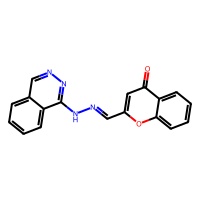
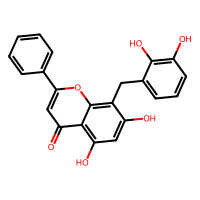
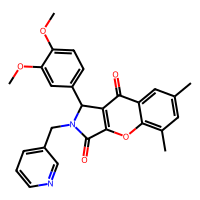
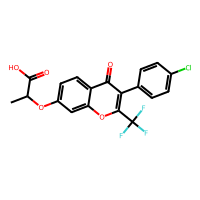
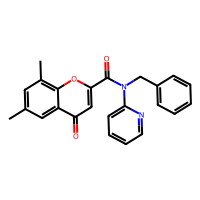
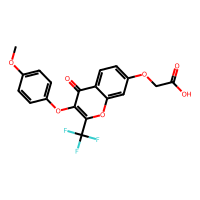
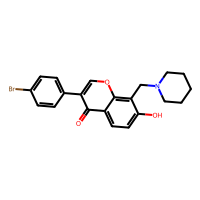
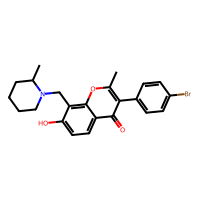
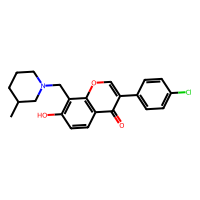
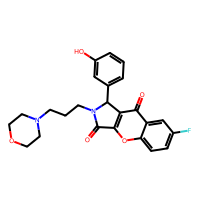
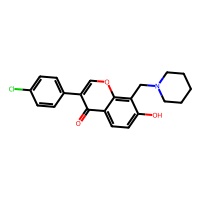
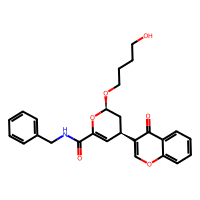
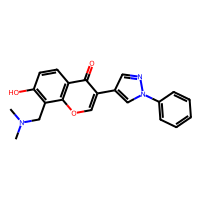
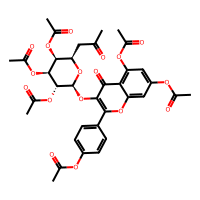
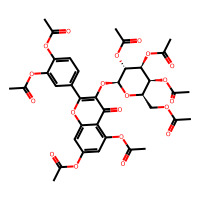
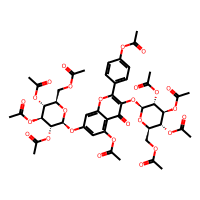
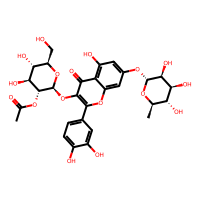
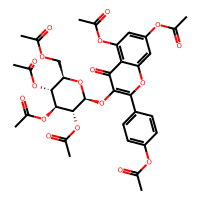
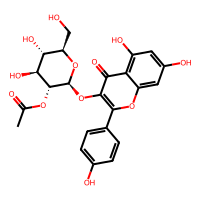
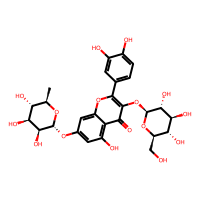
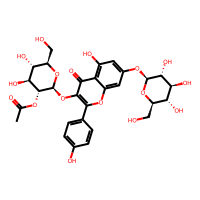
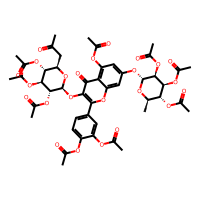

In [ ]:
PandasTools.AddMoleculeColumnToFrame(compuestos_final2, smilesCol='Smiles')
compuestos_final2

#Filtrado denuevo con similitud quimica. fingerprints


In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Fingerprints import FingerprintMols

In [ ]:
# Instalar las librerias
!pip install pandas rdkit tqdm useful_rdkit_utils seaborn scikit-posthocs chembl_downloader chembl_webresource_client  pubchempy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of jsonschema to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.5/82.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os

# Importar libreria para guardar trabajar con tablas
import pandas as pd
import numpy as np

# Importar las librerias de RDKit
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Fingerprints import FingerprintMols

# Importar las librerias para graficar
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import seaborn as sns

# Importar las funciones de 'scipy'
from scipy.cluster.hierarchy import dendrogram, linkage, is_valid_linkage, cut_tree

# Importar las funciones de 'sklearn'
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Importar libreria de ChEMBL
from chembl_webresource_client.new_client import new_client

# Importar libreria de PubChem
import pubchempy as pcp

# Importar libreria para ver una barra con el progreso de cada comando
from tqdm.auto import tqdm
tqdm.pandas()

# Importar el módulo de advertencias
import warnings

# Importar el módulo sys
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
#Para poder comparar las moléculas y medir su similitud,
#primero tenemos que generear el fingerprint molecular de cada una usando la función llamada FingerprintMol() del paquete FingerprintMols

In [ ]:
fps = [FingerprintMols.FingerprintMol(mol) for mol in compuestos_final2['ROMol']]


In [ ]:
len(compuestos_final2["ROMol"])


22

In [ ]:
len(fps)

22

In [ ]:
#para comparar moleculas

In [ ]:
# Imprimir la similitud de fingerprint moleculares entre fps[0] y fps[1]
print(DataStructs.FingerprintSimilarity(fps[0], fps[1]))

#La función FingerprintSimilarity() arroja valores entre 0 y 1, siendo 1 el que indica cuando dos moléculas son idénticas.

0.3470817120622568


,Unnamed: 0,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,...,HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,ROMol,ID
0,0,CHEMBL3813912,NaN,NaN,Small molecule,NaN,316.32,1.0,1.0,3.18,...,1,0,316.0960,-0.99,NEUTRAL,C18H12N4O2,O=c1cc(/C=N/Nc2nncc3ccccc23)oc2ccccc12,RIPDTAWJDXDWMP-RGVLZGJSSA-N,,0
1,1,CHEMBL4525888,NaN,NaN,Unknown,NaN,376.36,2.0,6.0,3.87,...,4,0,376.0947,1.05,ACID,C22H16O6,O=c1cc(-c2ccccc2)oc2c(Cc3cccc(O)c3O)c(O)cc(O)c12,MAFSHIJISCSKKD-UHFFFAOYSA-N,,1
2,2,CHEMBL1878333,NaN,NaN,Small molecule,NaN,456.50,1.0,1.0,4.57,...,0,0,456.1685,-0.66,NEUTRAL,C27H24N2O5,COc1ccc(C2c3c(oc4c(C)cc(C)cc4c3=O)C(=O)N2Cc2cc...,YMYUZGRHZRTSFP-UHFFFAOYSA-N,,2
3,3,CHEMBL1734466,NaN,NaN,Small molecule,NaN,412.75,2.0,2.0,4.98,...,1,0,412.0325,-0.78,ACID,C19H12ClF3O5,CC(Oc1ccc2c(=O)c(-c3ccc(Cl)cc3)c(C(F)(F)F)oc2c...,YPROHFBQSFVDGY-UHFFFAOYSA-N,,3
4,4,CHEMBL1487933,NaN,NaN,Small molecule,NaN,384.44,3.0,4.0,4.65,...,0,0,384.1474,-1.15,NEUTRAL,C24H20N2O3,Cc1cc(C)c2oc(C(=O)N(Cc3ccccc3)c3ccccn3)cc(=O)c2c1,XIEPHMPYYYCSBT-UHFFFAOYSA-N,,4
5,5,CHEMBL1736532,NaN,NaN,Small molecule,NaN,410.30,3.0,3.0,4.08,...,1,0,410.0613,-0.47,ACID,C19H13F3O7,COc1ccc(Oc2c(C(F)(F)F)oc3cc(OCC(=O)O)ccc3c2=O)cc1,DKXOCIGOSILVPD-UHFFFAOYSA-N,,5
6,6,CHEMBL1900694,NaN,NaN,Small molecule,NaN,414.30,3.0,4.0,4.91,...,1,0,413.0627,-0.06,ACID,C21H20BrNO3,O=c1c(-c2ccc(Br)cc2)coc2c(CN3CCCCC3)c(O)ccc12,HXCWKEAVTVPGAA-UHFFFAOYSA-N,,6
7,7,CHEMBL1395132,NaN,NaN,Small molecule,NaN,442.35,4.0,5.0,5.61,...,1,1,441.0940,-0.32,ACID,C23H24BrNO3,Cc1oc2c(CN3CCCCC3C)c(O)ccc2c(=O)c1-c1ccc(Br)cc1,UTZOOJMZMLLULY-UHFFFAOYSA-N,,7
8,8,CHEMBL1345635,NaN,NaN,Small molecule,NaN,383.88,4.0,4.0,5.05,...,1,1,383.1288,-0.19,ACID,C22H22ClNO3,CC1CCCN(Cc2c(O)ccc3c(=O)c(-c4ccc(Cl)cc4)coc23)C1,CTFKKFIZHGGSNR-UHFFFAOYSA-N,,8
9,9,CHEMBL1599285,NaN,NaN,Small molecule,NaN,438.46,4.0,4.0,2.91,...,1,0,438.1591,-1.02,NEUTRAL,C24H23FN2O5,O=C1c2oc3ccc(F)cc3c(=O)c2C(c2cccc(O)c2)N1CCCN1...,AXKVJTFILDQATN-UHFFFAOYSA-N,,9

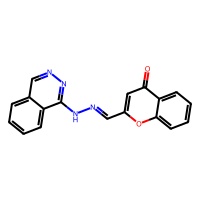
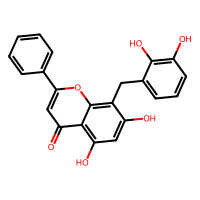
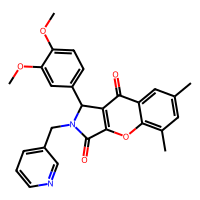
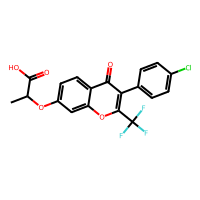
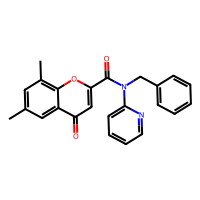
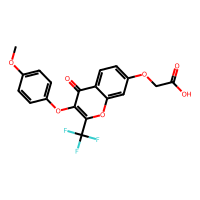
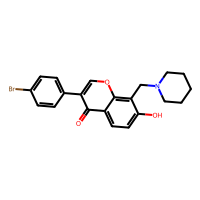
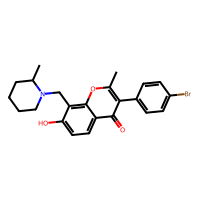
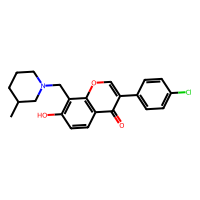
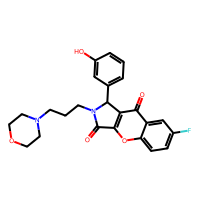
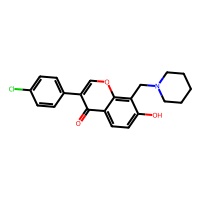
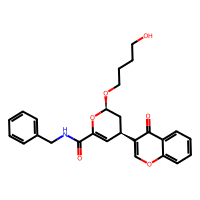
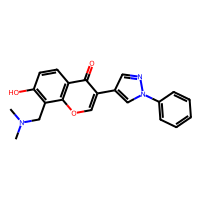
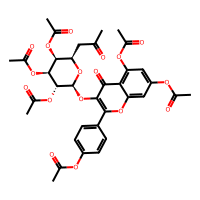
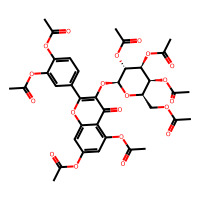
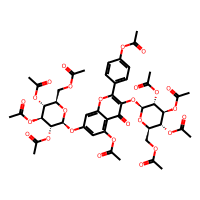
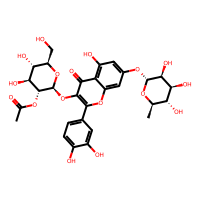
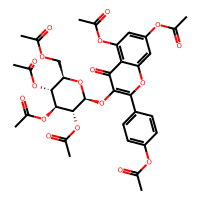
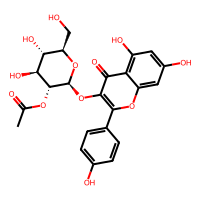
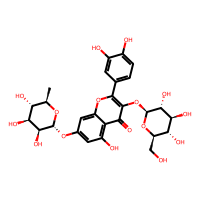
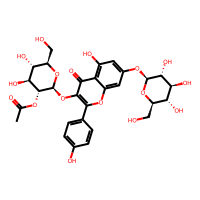
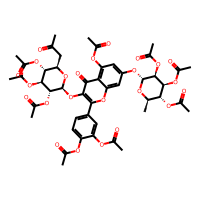

In [ ]:
compuestos_final2["ID"]=range(22)
compuestos_final2

In [ ]:
warnings.filterwarnings('ignore')
# Configurar el manejo de advertencias
warnings.filterwarnings('ignore')

# Obtener el tamaño de la tabla '
size = len(compuestos_final2)

# Crear un arreglo vacío para almacenar la matriz de similitud
hmap = np.empty(shape=(size, size))

# Crear un DataFrame vacío
table = pd.DataFrame()

# Iterar sobre las filas de la tabla
for i in range(len(compuestos_final2)):
    # Iterar sobre las columnas de la tabla
    for j in range(len(compuestos_final2)):
        # Calcular la similitud de huellas moleculares entre fps[i] y fps[j]
        similarity = DataStructs.FingerprintSimilarity(fps[i], fps[j])
        # Almacenar la similitud en la matriz hmap
        hmap[i, j] = similarity
        # Agregar la similitud al DataFrame 'table' con los índices correspondientes
        table.loc[compuestos_final2['ID'][i], compuestos_final2['ID'][j]] = similarity

In [ ]:
table

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.000000,0.347082,0.372599,0.397436,0.416862,0.411915,0.352753,0.378519,0.357030,0.374031,...,0.362211,0.340149,0.340282,0.339375,0.339297,0.338152,0.342782,0.339895,0.341764,0.344807
1,0.347082,1.000000,0.503094,0.469225,0.448276,0.437870,0.554160,0.543885,0.551510,0.478847,...,0.517266,0.533835,0.529084,0.531861,0.537121,0.534647,0.543883,0.545153,0.538562,0.526124
2,0.372599,0.503094,1.000000,0.470199,0.595556,0.445126,0.481734,0.548094,0.486769,0.828479,...,0.515625,0.569391,0.575956,0.565289,0.550499,0.560155,0.535654,0.533296,0.543224,0.587086
3,0.397436,0.469225,0.470199,1.000000,0.430603,0.578226,0.548563,0.624530,0.571317,0.465257,...,0.529921,0.496049,0.499095,0.497546,0.503769,0.496301,0.496795,0.504823,0.503812,0.500297
4,0.416862,0.448276,0.595556,0.430603,1.000000,0.416201,0.457627,0.506757,0.459441,0.556110,...,0.467871,0.456847,0.464183,0.456232,0.445748,0.454016,0.434705,0.437686,0.440898,0.470822
5,0.411915,0.437870,0.445126,0.578226,0.416201,1.000000,0.424944,0.457484,0.426145,0.442663,...,0.435518,0.459459,0.469075,0.466086,0.475399,0.464665,0.467710,0.480630,0.476067,0.465465
6,0.352753,0.554160,0.481734,0.548563,0.457627,0.424944,1.000000,0.854130,0.926543,0.485000,...,0.724626,0.470732,0.469523,0.471095,0.470219,0.469716,0.471990,0.470475,0.472681,0.472057
7,0.378519,0.543885,0.548094,0.624530,0.506757,0.457484,0.854130,1.000000,0.813776,0.542476,...,0.680931,0.520944,0.522834,0.519002,0.514475,0.516995,0.512647,0.506438,0.515558,0.528935
8,0.357030,0.551510,0.486769,0.571317,0.459441,0.426145,0.926543,0.813776,1.000000,0.483612,...,0.712418,0.478446,0.476276,0.477968,0.477230,0.476630,0.479180,0.477650,0.479772,0.479574
9,0.374031,0.478847,0.828479,0.465257,0.556110,0.442663,0.485000,0.542476,0.483612,1.000000,...,0.500000,0.563496,0.566667,0.559359,0.543635,0.555064,0.533860,0.528058,0.538892,0.577862


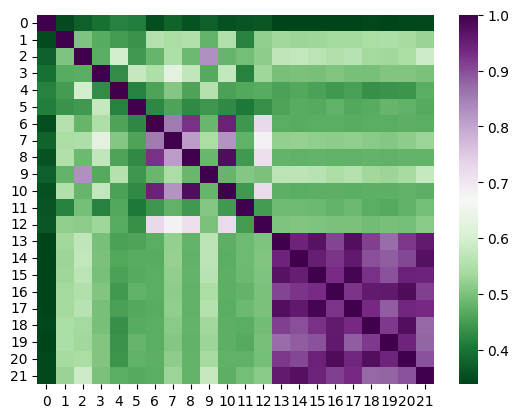

In [ ]:
heatmap = sns.heatmap(data=table,cmap='PRGn_r')

# Mostrar el gráfico
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage

In [ ]:
#La función linkage() es una función del módulo
## scipy.cluster.hierarchy que se utiliza para realizar la vinculación aglomerativa en análisis de agrupamiento (clustering).

#Es un clustering que comienza considerando cada punto
#(en este caso, moléculas) como un cluster individual y luego combina iterativamente los clusters más similares en clusteres más grandes.

In [ ]:
# Realizar la clusterización utilizando el método single de la matriz de similitud 'hmap'
linked = linkage(hmap,'single')

# Verifica la validez de la matriz
print(is_valid_linkage(linked))

# Crear una lista de etiquetas 'labelList' para las moléculas en la tabla
labelList = [compuestos_final2['ID'][i] for i in range(len(compuestos_final2))]

True


In [ ]:
def plot_dendrogram(model, **kwargs):
    # Crea una matriz de clustering y luego traza el dendrograma

    # Crea los conteos de muestras bajo cada nodo
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Nodo hoja
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Trama el dendrograma correspondiente
    dendrogram(linkage_matrix, **kwargs)

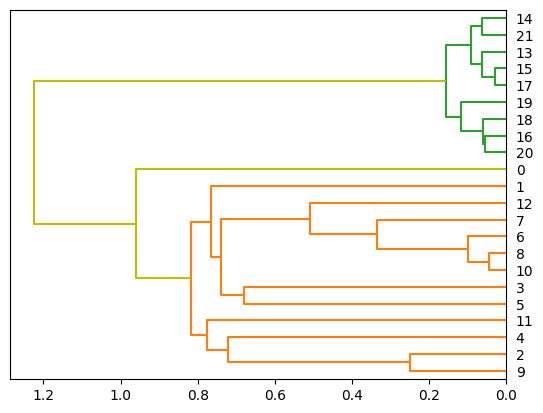

In [ ]:
# Generar el dendrograma
o = dendrogram(linked, orientation='left', distance_sort='descending', show_leaf_counts=True,  above_threshold_color='y')



Por último, vamos a generar un grafico que muestre la similitud y como se clusterizan las moléculas!

Primero vamos a ordenar las moléculas del heatmap para que coincidan con el roden del dendograma

In [ ]:
# Esto nos dará los clústeres en orden según el último dendrograma
new_data = list(reversed(o['ivl']))
# Creamos una nueva tabla con el orden del agrupamiento jerárquico (HCL)
hmap_2 = np.empty(shape=(size, size))
for index, i in enumerate(new_data):
  for jndex, j in enumerate(new_data):
       i = int(i)
       j = int(j)
       hmap_2[index, jndex] = table.loc[i].at[j]

[]

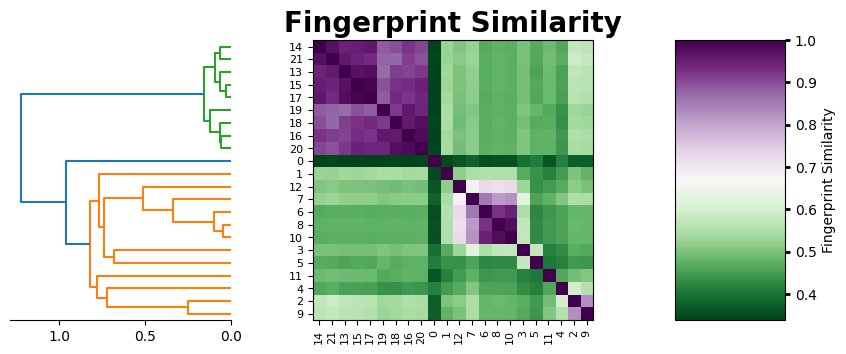

In [ ]:
# Crear una figura con tamaño de 10x8 pulgadas
figure = plt.figure(figsize=(10,8))

# Crear una rejilla de subtramas con 2 filas y 7 columnas
gs1 = gridspec.GridSpec(2, 7)
gs1.update(wspace=0.01)

# Subtrama para el dendrograma
ax1 = plt.subplot(gs1[0:-1, :2])
dendrogram(linked, orientation='left', distance_sort='descending', show_leaf_counts=True, no_labels=True)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Subtrama para la matriz de similitud
ax2 = plt.subplot(gs1[0:-1, 2:6])
f = ax2.imshow(hmap_2, cmap='PRGn_r', interpolation='nearest')
ax2.set_title('Fingerprint Similarity', fontsize=20, weight='bold')
ax2.set_xticks(range(len(new_data)))
ax2.set_yticks(range(len(new_data)))
ax2.set_xticklabels(new_data, rotation=90, size=8)
ax2.set_yticklabels(new_data, size=8)

# Subtrama para la barra de color
ax3 = plt.subplot(gs1[0:-1, 6:7])
m = plt.colorbar(f, cax=ax3, shrink=0.75, orientation='vertical', spacing='uniform', pad=0.01)
m.set_label('Fingerprint Similarity')

# Configurar los parámetros de las etiquetas de los ejes
plt.tick_params('both', width=2)

# Mostrar el gráfico
plt.plot()

,Unnamed: 0,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,...,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,ROMol,ID,Cluster_fingerprints
0,0,CHEMBL3813912,NaN,NaN,Small molecule,NaN,316.32,1.0,1.0,3.18,...,0,316.0960,-0.99,NEUTRAL,C18H12N4O2,O=c1cc(/C=N/Nc2nncc3ccccc23)oc2ccccc12,RIPDTAWJDXDWMP-RGVLZGJSSA-N,,0,0
1,1,CHEMBL4525888,NaN,NaN,Unknown,NaN,376.36,2.0,6.0,3.87,...,0,376.0947,1.05,ACID,C22H16O6,O=c1cc(-c2ccccc2)oc2c(Cc3cccc(O)c3O)c(O)cc(O)c12,MAFSHIJISCSKKD-UHFFFAOYSA-N,,1,0
2,2,CHEMBL1878333,NaN,NaN,Small molecule,NaN,456.50,1.0,1.0,4.57,...,0,456.1685,-0.66,NEUTRAL,C27H24N2O5,COc1ccc(C2c3c(oc4c(C)cc(C)cc4c3=O)C(=O)N2Cc2cc...,YMYUZGRHZRTSFP-UHFFFAOYSA-N,,2,0
3,3,CHEMBL1734466,NaN,NaN,Small molecule,NaN,412.75,2.0,2.0,4.98,...,0,412.0325,-0.78,ACID,C19H12ClF3O5,CC(Oc1ccc2c(=O)c(-c3ccc(Cl)cc3)c(C(F)(F)F)oc2c...,YPROHFBQSFVDGY-UHFFFAOYSA-N,,3,0
4,4,CHEMBL1487933,NaN,NaN,Small molecule,NaN,384.44,3.0,4.0,4.65,...,0,384.1474,-1.15,NEUTRAL,C24H20N2O3,Cc1cc(C)c2oc(C(=O)N(Cc3ccccc3)c3ccccn3)cc(=O)c2c1,XIEPHMPYYYCSBT-UHFFFAOYSA-N,,4,0
5,5,CHEMBL1736532,NaN,NaN,Small molecule,NaN,410.30,3.0,3.0,4.08,...,0,410.0613,-0.47,ACID,C19H13F3O7,COc1ccc(Oc2c(C(F)(F)F)oc3cc(OCC(=O)O)ccc3c2=O)cc1,DKXOCIGOSILVPD-UHFFFAOYSA-N,,5,0
6,6,CHEMBL1900694,NaN,NaN,Small molecule,NaN,414.30,3.0,4.0,4.91,...,0,413.0627,-0.06,ACID,C21H20BrNO3,O=c1c(-c2ccc(Br)cc2)coc2c(CN3CCCCC3)c(O)ccc12,HXCWKEAVTVPGAA-UHFFFAOYSA-N,,6,0
7,7,CHEMBL1395132,NaN,NaN,Small molecule,NaN,442.35,4.0,5.0,5.61,...,1,441.0940,-0.32,ACID,C23H24BrNO3,Cc1oc2c(CN3CCCCC3C)c(O)ccc2c(=O)c1-c1ccc(Br)cc1,UTZOOJMZMLLULY-UHFFFAOYSA-N,,7,0
8,8,CHEMBL1345635,NaN,NaN,Small molecule,NaN,383.88,4.0,4.0,5.05,...,1,383.1288,-0.19,ACID,C22H22ClNO3,CC1CCCN(Cc2c(O)ccc3c(=O)c(-c4ccc(Cl)cc4)coc23)C1,CTFKKFIZHGGSNR-UHFFFAOYSA-N,,8,0
9,9,CHEMBL1599285,NaN,NaN,Small molecule,NaN,438.46,4.0,4.0,2.91,...,0,438.1591,-1.02,NEUTRAL,C24H23FN2O5,O=C1c2oc3ccc(F)cc3c(=O)c2C(c2cccc(O)c2)N1CCCN1...,AXKVJTFILDQATN-UHFFFAOYSA-N,,9,0

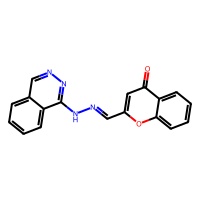
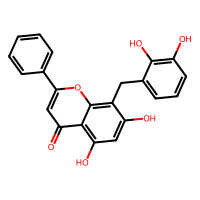
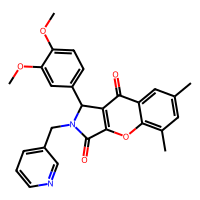
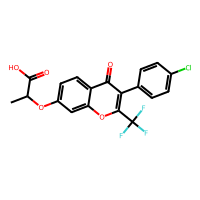
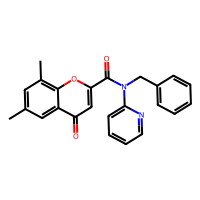
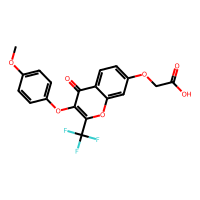
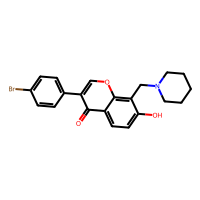
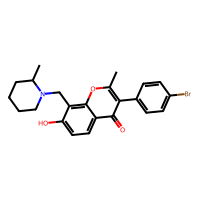
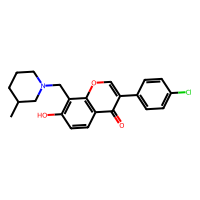
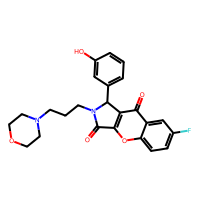
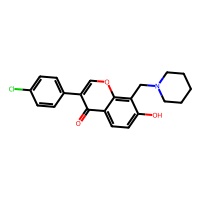
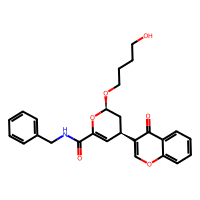
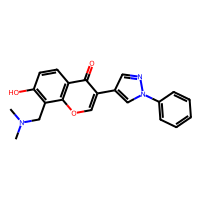
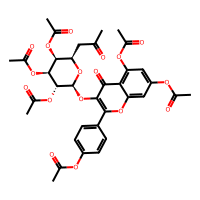
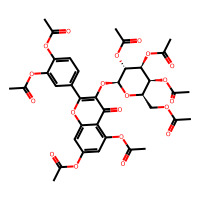
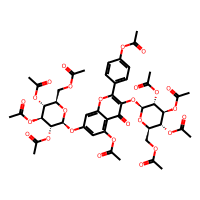
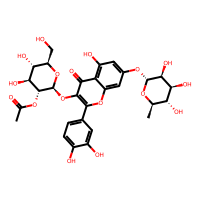
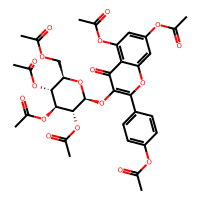
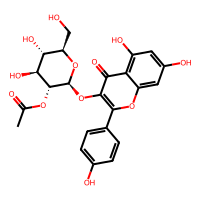
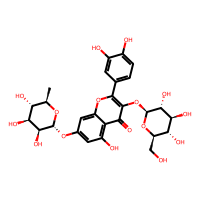
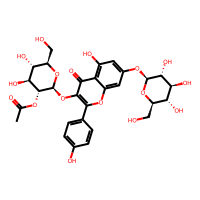
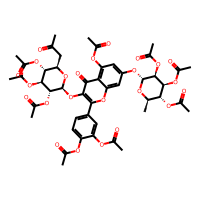

In [ ]:
# Indicar la cantidad de clusters:
n = 2

# Obtener los clusters utilizando cut_tree con un número específico de clusters
clusters = cut_tree(linked, n)

# Agregar el número de cluster a la tabla
compuestos_final2['Cluster_fingerprints'] = clusters.flatten()
compuestos_final2

In [ ]:
compuestos_final_cluster_0 = compuestos_final2.loc[compuestos_final2['Cluster_fingerprints'] == 0]
compuestos_final_cluster_1 = compuestos_final2.loc[compuestos_final2['Cluster_fingerprints'] == 1]

In [ ]:

compuestos_final_cluster_0

,Unnamed: 0,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,...,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,ROMol,ID,Cluster_fingerprints
0,0,CHEMBL3813912,NaN,NaN,Small molecule,NaN,316.32,1.0,1.0,3.18,...,0,316.0960,-0.99,NEUTRAL,C18H12N4O2,O=c1cc(/C=N/Nc2nncc3ccccc23)oc2ccccc12,RIPDTAWJDXDWMP-RGVLZGJSSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0625230>,0,0
1,1,CHEMBL4525888,NaN,NaN,Unknown,NaN,376.36,2.0,6.0,3.87,...,0,376.0947,1.05,ACID,C22H16O6,O=c1cc(-c2ccccc2)oc2c(Cc3cccc(O)c3O)c(O)cc(O)c12,MAFSHIJISCSKKD-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0625070>,1,0
2,2,CHEMBL1878333,NaN,NaN,Small molecule,NaN,456.50,1.0,1.0,4.57,...,0,456.1685,-0.66,NEUTRAL,C27H24N2O5,COc1ccc(C2c3c(oc4c(C)cc(C)cc4c3=O)C(=O)N2Cc2cc...,YMYUZGRHZRTSFP-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626ce0>,2,0
3,3,CHEMBL1734466,NaN,NaN,Small molecule,NaN,412.75,2.0,2.0,4.98,...,0,412.0325,-0.78,ACID,C19H12ClF3O5,CC(Oc1ccc2c(=O)c(-c3ccc(Cl)cc3)c(C(F)(F)F)oc2c...,YPROHFBQSFVDGY-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0627220>,3,0
4,4,CHEMBL1487933,NaN,NaN,Small molecule,NaN,384.44,3.0,4.0,4.65,...,0,384.1474,-1.15,NEUTRAL,C24H20N2O3,Cc1cc(C)c2oc(C(=O)N(Cc3ccccc3)c3ccccn3)cc(=O)c2c1,XIEPHMPYYYCSBT-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626880>,4,0
5,5,CHEMBL1736532,NaN,NaN,Small molecule,NaN,410.30,3.0,3.0,4.08,...,0,410.0613,-0.47,ACID,C19H13F3O7,COc1ccc(Oc2c(C(F)(F)F)oc3cc(OCC(=O)O)ccc3c2=O)cc1,DKXOCIGOSILVPD-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0627300>,5,0
6,6,CHEMBL1900694,NaN,NaN,Small molecule,NaN,414.30,3.0,4.0,4.91,...,0,413.0627,-0.06,ACID,C21H20BrNO3,O=c1c(-c2ccc(Br)cc2)coc2c(CN3CCCCC3)c(O)ccc12,HXCWKEAVTVPGAA-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06268f0>,6,0
7,7,CHEMBL1395132,NaN,NaN,Small molecule,NaN,442.35,4.0,5.0,5.61,...,1,441.0940,-0.32,ACID,C23H24BrNO3,Cc1oc2c(CN3CCCCC3C)c(O)ccc2c(=O)c1-c1ccc(Br)cc1,UTZOOJMZMLLULY-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626a40>,7,0
8,8,CHEMBL1345635,NaN,NaN,Small molecule,NaN,383.88,4.0,4.0,5.05,...,1,383.1288,-0.19,ACID,C22H22ClNO3,CC1CCCN(Cc2c(O)ccc3c(=O)c(-c4ccc(Cl)cc4)coc23)C1,CTFKKFIZHGGSNR-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06271b0>,8,0
9,9,CHEMBL1599285,NaN,NaN,Small molecule,NaN,438.46,4.0,4.0,2.91,...,0,438.1591,-1.02,NEUTRAL,C24H23FN2O5,O=C1c2oc3ccc(F)cc3c(=O)c2C(c2cccc(O)c2)N1CCCN1...,AXKVJTFILDQATN-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0627b50>,9,0


In [ ]:
compuestos_final_cluster_1


,Unnamed: 0,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,...,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,ROMol,ID,Cluster_fingerprints
13,13,CHEMBL540456,NaN,Hepta-O-Acetyltrifolin,Small molecule,NaN,726.64,3.0,28.0,3.11,...,2,726.1796,1.13,NEUTRAL,C35H34O17,CC(=O)C[C@H]1O[C@@H](Oc2c(-c3ccc(OC(C)=O)cc3)o...,ASLFDLAUZYNCOH-BWEQVBEUSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626c70>,13,1
14,14,CHEMBL501162,NaN,Octa-O-Acetylhyperoside|Quercetin-3-Galactosid...,Small molecule,NaN,800.68,4.0,30.0,2.62,...,2,800.1800,1.12,NEUTRAL,C37H36O20,CC(=O)OC[C@H]1O[C@@H](Oc2c(-c3ccc(OC(C)=O)c(OC...,TVRPKUGAMSRLJH-CHLLVNLZSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0627bc0>,14,1
15,15,CHEMBL1774170,PAEONOSIDE DECAACETATE,Paeonoside Decaacetate,Small molecule,NaN,1030.89,4.0,15.0,None,...,None,1030.2590,None,None,C47H50O26,CC(=O)OC[C@H]1O[C@@H](Oc2cc(OC(C)=O)c3c(=O)c(O...,NLVNWKWBXDAKIC-GHNQEIAISA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06267a0>,15,1
16,16,CHEMBL1774172,NaN,2'-Acetylpetiolaroside,Small molecule,NaN,652.56,4.0,12.0,-1.47,...,3,652.1639,2.23,NEUTRAL,C29H32O17,CC(=O)O[C@H]1[C@H](Oc2c(-c3ccc(O)c(O)c3)oc3cc(...,RZRIJLLGEUPKNZ-NILYLAQZSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626810>,16,1
17,17,CHEMBL1774168,ASTRAGALIN HEPTAACETATE,Astragalin Heptaacetate,Small molecule,NaN,742.64,4.0,12.0,2.70,...,2,742.1745,1.15,NEUTRAL,C35H34O18,CC(=O)OC[C@H]1O[C@@H](Oc2c(-c3ccc(OC(C)=O)cc3)...,XNIDEUYQVRRKJJ-FZPNTLRJSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0627450>,17,1
18,18,CHEMBL1774167,NaN,2'-Acetylastragalin,Small molecule,NaN,490.42,4.0,15.0,0.33,...,2,490.1111,2.20,ACID,C23H22O12,CC(=O)O[C@H]1[C@H](Oc2c(-c3ccc(O)cc3)oc3cc(O)c...,MWEQHAGXLGTSKL-OPCQMSRDSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626960>,18,1
19,19,CHEMBL1774171,PETIOLAROSIDE,Petiolaroside,Small molecule,NaN,610.52,4.0,12.0,-2.04,...,3,610.1534,1.92,NEUTRAL,C27H30O16,C[C@H]1O[C@H](Oc2cc(O)c3c(=O)c(O[C@@H]4O[C@H](...,OTUCXMIQUNROBJ-LOOCNDHYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626dc0>,19,1
20,20,CHEMBL1774169,NaN,2'-Acetylapaeonoside,Small molecule,NaN,652.56,4.0,12.0,-2.20,...,3,652.1639,1.90,NEUTRAL,C29H32O17,CC(=O)O[C@H]1[C@H](Oc2c(-c3ccc(O)cc3)oc3cc(O[C...,UNCGSIXTLZAFKK-RXRZWAIISA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06269d0>,20,1
21,21,CHEMBL1774173,PETIOLAROSIDE DECAACETATE,Petiolaroside Decaacetate,Small molecule,NaN,1014.89,4.0,14.0,None,...,None,1014.2641,None,None,C47H50O25,CC(=O)C[C@H]1O[C@@H](Oc2c(-c3ccc(OC(C)=O)c(OC(...,WVTZEWYTKKLYOF-OFRLXYNDSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06274c0>,21,1


In [ ]:
compuestos_final_cluster_0=compuestos_final_cluster_0.reset_index()
compuestos_final_cluster_0

,index,Unnamed: 0,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,...,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,ROMol,ID,Cluster_fingerprints
0,0,0,CHEMBL3813912,NaN,NaN,Small molecule,NaN,316.32,1.0,1.0,...,0,316.0960,-0.99,NEUTRAL,C18H12N4O2,O=c1cc(/C=N/Nc2nncc3ccccc23)oc2ccccc12,RIPDTAWJDXDWMP-RGVLZGJSSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0625230>,0,0
1,1,1,CHEMBL4525888,NaN,NaN,Unknown,NaN,376.36,2.0,6.0,...,0,376.0947,1.05,ACID,C22H16O6,O=c1cc(-c2ccccc2)oc2c(Cc3cccc(O)c3O)c(O)cc(O)c12,MAFSHIJISCSKKD-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0625070>,1,0
2,2,2,CHEMBL1878333,NaN,NaN,Small molecule,NaN,456.50,1.0,1.0,...,0,456.1685,-0.66,NEUTRAL,C27H24N2O5,COc1ccc(C2c3c(oc4c(C)cc(C)cc4c3=O)C(=O)N2Cc2cc...,YMYUZGRHZRTSFP-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626ce0>,2,0
3,3,3,CHEMBL1734466,NaN,NaN,Small molecule,NaN,412.75,2.0,2.0,...,0,412.0325,-0.78,ACID,C19H12ClF3O5,CC(Oc1ccc2c(=O)c(-c3ccc(Cl)cc3)c(C(F)(F)F)oc2c...,YPROHFBQSFVDGY-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0627220>,3,0
4,4,4,CHEMBL1487933,NaN,NaN,Small molecule,NaN,384.44,3.0,4.0,...,0,384.1474,-1.15,NEUTRAL,C24H20N2O3,Cc1cc(C)c2oc(C(=O)N(Cc3ccccc3)c3ccccn3)cc(=O)c2c1,XIEPHMPYYYCSBT-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626880>,4,0
5,5,5,CHEMBL1736532,NaN,NaN,Small molecule,NaN,410.30,3.0,3.0,...,0,410.0613,-0.47,ACID,C19H13F3O7,COc1ccc(Oc2c(C(F)(F)F)oc3cc(OCC(=O)O)ccc3c2=O)cc1,DKXOCIGOSILVPD-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0627300>,5,0
6,6,6,CHEMBL1900694,NaN,NaN,Small molecule,NaN,414.30,3.0,4.0,...,0,413.0627,-0.06,ACID,C21H20BrNO3,O=c1c(-c2ccc(Br)cc2)coc2c(CN3CCCCC3)c(O)ccc12,HXCWKEAVTVPGAA-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06268f0>,6,0
7,7,7,CHEMBL1395132,NaN,NaN,Small molecule,NaN,442.35,4.0,5.0,...,1,441.0940,-0.32,ACID,C23H24BrNO3,Cc1oc2c(CN3CCCCC3C)c(O)ccc2c(=O)c1-c1ccc(Br)cc1,UTZOOJMZMLLULY-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626a40>,7,0
8,8,8,CHEMBL1345635,NaN,NaN,Small molecule,NaN,383.88,4.0,4.0,...,1,383.1288,-0.19,ACID,C22H22ClNO3,CC1CCCN(Cc2c(O)ccc3c(=O)c(-c4ccc(Cl)cc4)coc23)C1,CTFKKFIZHGGSNR-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06271b0>,8,0
9,9,9,CHEMBL1599285,NaN,NaN,Small molecule,NaN,438.46,4.0,4.0,...,0,438.1591,-1.02,NEUTRAL,C24H23FN2O5,O=C1c2oc3ccc(F)cc3c(=O)c2C(c2cccc(O)c2)N1CCCN1...,AXKVJTFILDQATN-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0627b50>,9,0


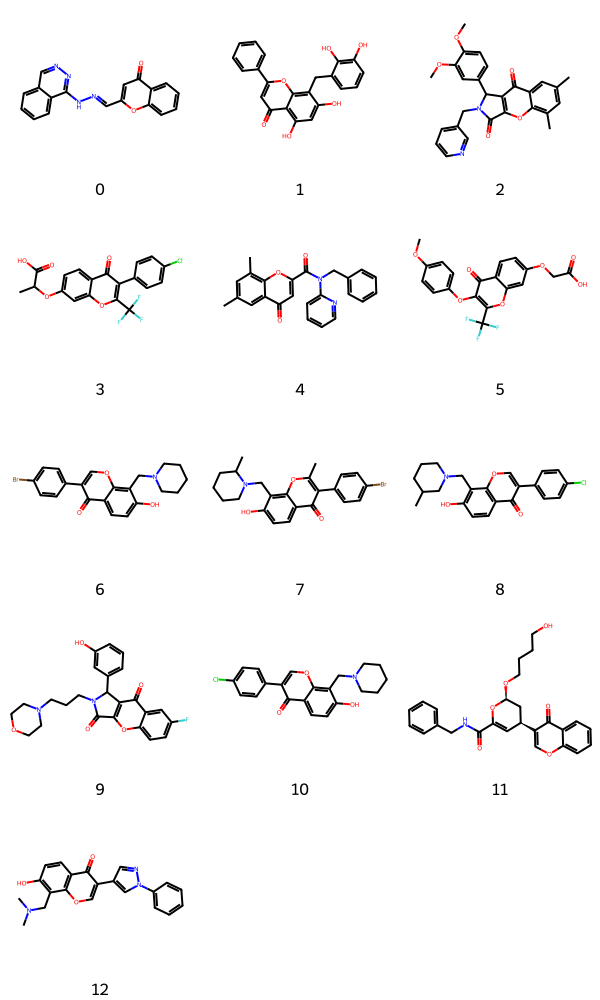

In [ ]:
Chem.Draw.MolsToGridImage(compuestos_final_cluster_0['ROMol'], legends = [(str(compuestos_final_cluster_0['ID'][i])) for i in range(len(compuestos_final_cluster_0))])

In [ ]:
compuestos_final_cluster_1=compuestos_final_cluster_1.reset_index()


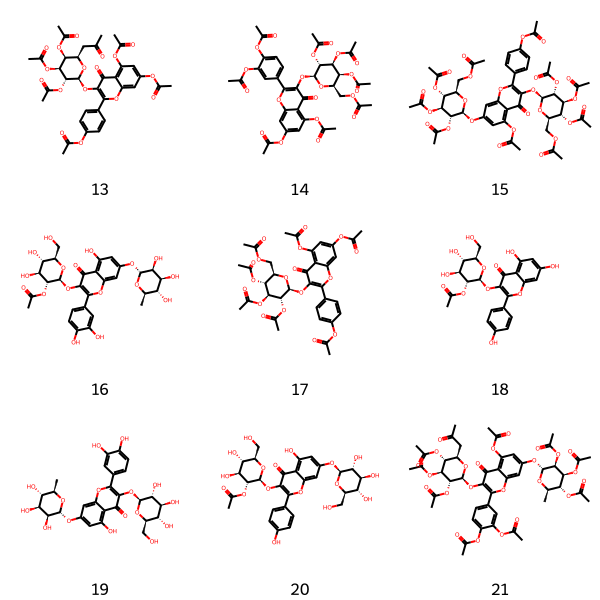

In [ ]:
Chem.Draw.MolsToGridImage(compuestos_final_cluster_1['ROMol'], legends = [(str(compuestos_final_cluster_1['ID'][i])) for i in range(len(compuestos_final_cluster_1))])

# clustering por PCA



In [ ]:
compuestos_final=compuestos_final.drop([15,21],axis=0,inplace=False)
compuestos_final #borre porue tenian none en hbd

In [ ]:
compuestos_final

,level_0,index,Unnamed: 0,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,...,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,ROMol
0,0,0,0,CHEMBL3813912,NaN,NaN,Small molecule,NaN,316.32,1.0,...,6,1,0,316.0960,-0.99,NEUTRAL,C18H12N4O2,O=c1cc(/C=N/Nc2nncc3ccccc23)oc2ccccc12,RIPDTAWJDXDWMP-RGVLZGJSSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0624dd0>
1,1,1,1,CHEMBL4525888,NaN,NaN,Unknown,NaN,376.36,2.0,...,6,4,0,376.0947,1.05,ACID,C22H16O6,O=c1cc(-c2ccccc2)oc2c(Cc3cccc(O)c3O)c(O)cc(O)c12,MAFSHIJISCSKKD-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626110>
2,2,2,2,CHEMBL1878333,NaN,NaN,Small molecule,NaN,456.50,1.0,...,7,0,0,456.1685,-0.66,NEUTRAL,C27H24N2O5,COc1ccc(C2c3c(oc4c(C)cc(C)cc4c3=O)C(=O)N2Cc2cc...,YMYUZGRHZRTSFP-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0625bd0>
3,3,3,3,CHEMBL1734466,NaN,NaN,Small molecule,NaN,412.75,2.0,...,5,1,0,412.0325,-0.78,ACID,C19H12ClF3O5,CC(Oc1ccc2c(=O)c(-c3ccc(Cl)cc3)c(C(F)(F)F)oc2c...,YPROHFBQSFVDGY-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06261f0>
4,4,4,4,CHEMBL1487933,NaN,NaN,Small molecule,NaN,384.44,3.0,...,5,0,0,384.1474,-1.15,NEUTRAL,C24H20N2O3,Cc1cc(C)c2oc(C(=O)N(Cc3ccccc3)c3ccccn3)cc(=O)c2c1,XIEPHMPYYYCSBT-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06258c0>
5,5,5,5,CHEMBL1736532,NaN,NaN,Small molecule,NaN,410.30,3.0,...,7,1,0,410.0613,-0.47,ACID,C19H13F3O7,COc1ccc(Oc2c(C(F)(F)F)oc3cc(OCC(=O)O)ccc3c2=O)cc1,DKXOCIGOSILVPD-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626420>
6,6,6,6,CHEMBL1900694,NaN,NaN,Small molecule,NaN,414.30,3.0,...,4,1,0,413.0627,-0.06,ACID,C21H20BrNO3,O=c1c(-c2ccc(Br)cc2)coc2c(CN3CCCCC3)c(O)ccc12,HXCWKEAVTVPGAA-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06260a0>
7,7,7,7,CHEMBL1395132,NaN,NaN,Small molecule,NaN,442.35,4.0,...,4,1,1,441.0940,-0.32,ACID,C23H24BrNO3,Cc1oc2c(CN3CCCCC3C)c(O)ccc2c(=O)c1-c1ccc(Br)cc1,UTZOOJMZMLLULY-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626c00>
8,8,8,8,CHEMBL1345635,NaN,NaN,Small molecule,NaN,383.88,4.0,...,4,1,1,383.1288,-0.19,ACID,C22H22ClNO3,CC1CCCN(Cc2c(O)ccc3c(=O)c(-c4ccc(Cl)cc4)coc23)C1,CTFKKFIZHGGSNR-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06262d0>
9,9,9,9,CHEMBL1599285,NaN,NaN,Small molecule,NaN,438.46,4.0,...,7,1,0,438.1591,-1.02,NEUTRAL,C24H23FN2O5,O=C1c2oc3ccc(F)cc3c(=O)c2C(c2cccc(O)c2)N1CCCN1...,AXKVJTFILDQATN-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0625c40>


In [ ]:
#hay 2 compuestos que no tienen peso molecular dice none y no los puedo estandarizar
#o los borro o les agrego un promedio de los pesos mleculares

In [ ]:
# Paso 1: Obtener los descriptores moleculares de la tabla Targets son como 7300
descriptors = compuestos_final.loc[:,['Molecular Weight', 'HBD (Lipinski)','HBA (Lipinski)', 'AlogP',"Polar Surface Area"]].values

# Paso 2: Normalizar los descriptores utilizando StandardScaler
descriptors_std = StandardScaler().fit_transform(descriptors)

# Paso 3: Aplicar PCA a los descriptores normalizados
pca = PCA()
descriptors_2d = pca.fit_transform(descriptors_std)

# Formateo de datos
# Crear un DataFrame con las coordenadas PCA
descriptors_pca = pd.DataFrame(descriptors_2d)

# Establecer el índice del DataFrame como el índice de la tabla CHEMBL674637
descriptors_pca.index = compuestos_final.index

# Etiquetar las columnas del DataFrame como PC1, PC2, PC3, etc.
descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]

# Mostrar el DataFrame con las coordenadas PCA
descriptors_pca

,PC1,PC2,PC3,PC4,PC5
0,-1.365122,-0.555730,0.621989,0.150328,0.005729
1,-0.803223,-0.827828,-0.288969,0.363035,-0.008810
2,-1.232772,0.451163,0.014131,-0.073088,-0.030200
3,-1.533875,0.027863,-0.220338,0.077400,0.049853
4,-1.744666,0.068175,0.137013,-0.003659,0.033340
5,-1.085842,0.007308,0.121491,0.126515,-0.010012
6,-1.736336,-0.065421,-0.259203,-0.155237,0.016903
7,-1.788877,0.151779,-0.535343,-0.116938,-0.012647
8,-1.855327,-0.150966,-0.192260,-0.006223,-0.015772
9,-0.842406,-0.102645,0.327434,-0.315594,0.008022


In [ ]:
# Varianza para cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

# La varianza acumulada da 1
explained_variance_cumulative = sum(explained_variance_ratio)
print(explained_variance_cumulative)

[7.84583681e-01 1.98440991e-01 1.31387113e-02 3.73604866e-03
 1.00568718e-04]
1.0


<Figure size 800x600 with 0 Axes>

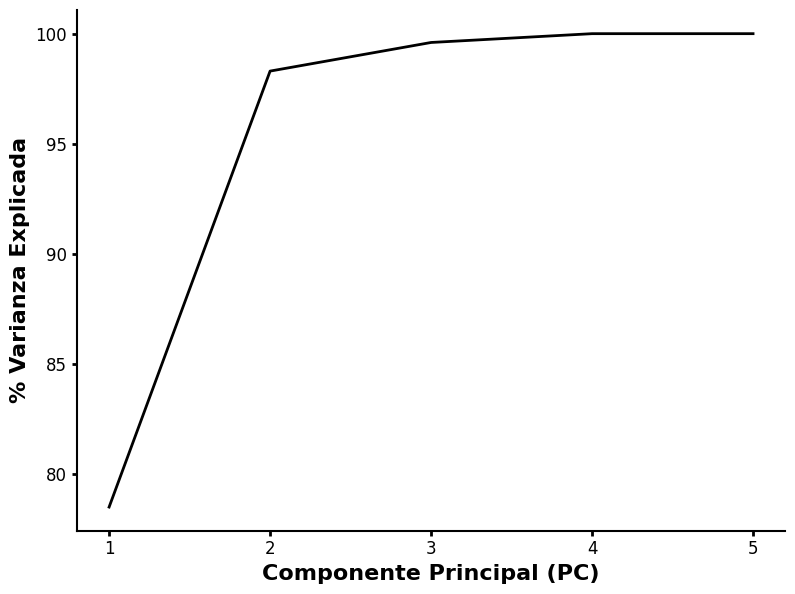

In [ ]:
# Configuración de las propiedades de las gráficas
plt.rcParams['axes.linewidth'] = 1.5

# Creación de la figura y los ejes de la gráfica
plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(8,6))

# Cálculo de la varianza acumulada y trazado de la curva de varianza explicada
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.plot([i+1 for i in range(len(var))],var,'k-',linewidth=2)

# Configuración de los ticks y etiquetas de los ejes
plt.xticks([i+1 for i in range(len(var))])
plt.ylabel('% Varianza Explicada',fontsize=16,fontweight='bold')
plt.xlabel('Componente Principal (PC)',fontsize=16,fontweight='bold')

# Configuración de los bordes de la gráfica
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajuste del diseño de la gráfica
plt.tight_layout()
plt.tick_params('both',width=2,labelsize=12)

Ahora vamos a generar un gráfico de dispersión bidimensional para visualizar la proyección de las muestras en el espacio de las dos primeras componentes principales obtenidas mediante PCA.

El gráfico nos permite explorar y comprender la estructura y variabilidad de los datos en un espacio de menor dimensión.

Cada punto en el gráfico representa una muestra del conjunto de datos. La posición de cada punto en el eje x está determinada por el valor de la primera componente principal (PC1), mientras que la posición en el eje y está determinada por el valor de la segunda componente principal (PC2).

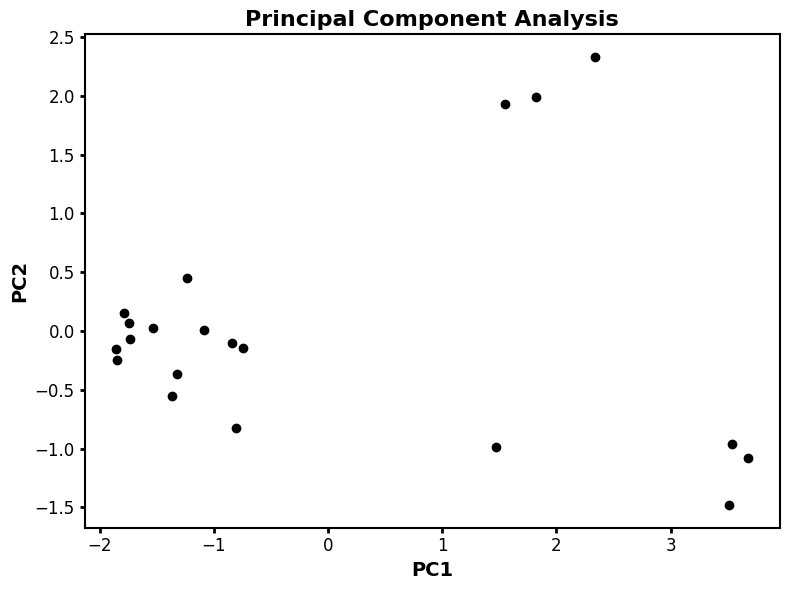

In [ ]:
# Creamos una figura para el gráfico
fig = plt.figure(figsize=(8,6))
# Agregamos un subplot a la figura
ax = fig.add_subplot(111)

# Graficamos los puntos en el espacio de las dos primeras componentes principales
ax.plot(descriptors_pca['PC1'], descriptors_pca['PC2'], 'o', color='k')

# Configuramos el título del gráfico
ax.set_title('Principal Component Analysis', fontsize=16, fontweight='bold', family='sans-serif')
# Configuramos la etiqueta del eje x
ax.set_xlabel('PC1', fontsize=14, fontweight='bold')
# Configuramos la etiqueta del eje y
ax.set_ylabel('PC2', fontsize=14, fontweight='bold')

# Configuramos los parámetros de los ticks y labels
plt.tick_params('both', width=2, labelsize=12)

# Ajustamos el espaciado del gráfico
plt.tight_layout()
# Mostramos el gráfico
plt.show()

In [ ]:
# Calculamos la escala para normalizar las componentes principales
scale1 = 1.0 / (max(descriptors_pca['PC1']) - min(descriptors_pca['PC1']))
scale2 = 1.0 / (max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))

# Normalizamos las componentes principales y las almacenamos en nuevas columnas
descriptors_pca['PC1_normalized'] = [i * scale1 for i in descriptors_pca['PC1']]
descriptors_pca['PC2_normalized'] = [i * scale2 for i in descriptors_pca['PC2']]

# Imprimir las primeras 10 filas de la tabla
descriptors_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC1_normalized,PC2_normalized
0,-1.365122,-0.555730,0.621989,0.150328,0.005729,-0.246591,-0.145713
1,-0.803223,-0.827828,-0.288969,0.363035,-0.008810,-0.145091,-0.217058
2,-1.232772,0.451163,0.014131,-0.073088,-0.030200,-0.222684,0.118296
3,-1.533875,0.027863,-0.220338,0.077400,0.049853,-0.277074,0.007306
4,-1.744666,0.068175,0.137013,-0.003659,0.033340,-0.315150,0.017876
5,-1.085842,0.007308,0.121491,0.126515,-0.010012,-0.196143,0.001916
6,-1.736336,-0.065421,-0.259203,-0.155237,0.016903,-0.313646,-0.017154
7,-1.788877,0.151779,-0.535343,-0.116938,-0.012647,-0.323136,0.039797
8,-1.855327,-0.150966,-0.192260,-0.006223,-0.015772,-0.335140,-0.039583
9,-0.842406,-0.102645,0.327434,-0.315594,0.008022,-0.152169,-0.026914


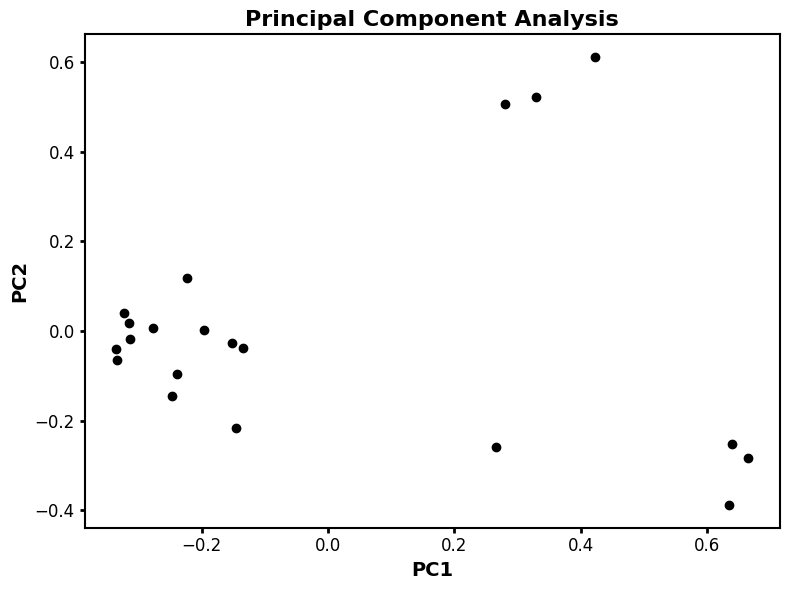

In [ ]:
# Crear una nueva figura con tamaño de 8x6 pulgadas
fig = plt.figure(figsize=(8, 6))

# Agregar un único subplot en la figura
ax = fig.add_subplot(111)

# Graficar las componentes principales normalizadas
ax.plot(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'], 'o', color='k')

# Establecer el título del gráfico
ax.set_title('Principal Component Analysis', fontsize=16, fontweight='bold', family='sans-serif')

# Etiquetar el eje x
ax.set_xlabel('PC1', fontsize=14, fontweight='bold')

# Etiquetar el eje y
ax.set_ylabel('PC2', fontsize=14, fontweight='bold')

# Configurar los parámetros de las marcas en los ejes
plt.tick_params('both', width=2, labelsize=12)

# Ajustar el diseño del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
range_K_clusters = [2, 3, 4, 5, 6, 7,8,9]

Para n_clusters = 2 El coeficiente de silueta promedio es: 0.6341742743489849
Para n_clusters = 3 El coeficiente de silueta promedio es: 0.794511725223815
Para n_clusters = 4 El coeficiente de silueta promedio es: 0.7193614698156122
Para n_clusters = 5 El coeficiente de silueta promedio es: 0.5040153544431395
Para n_clusters = 6 El coeficiente de silueta promedio es: 0.5399773848026179
Para n_clusters = 7 El coeficiente de silueta promedio es: 0.5549285525714505
Para n_clusters = 8 El coeficiente de silueta promedio es: 0.49589119425391887
Para n_clusters = 9 El coeficiente de silueta promedio es: 0.4903453508872063


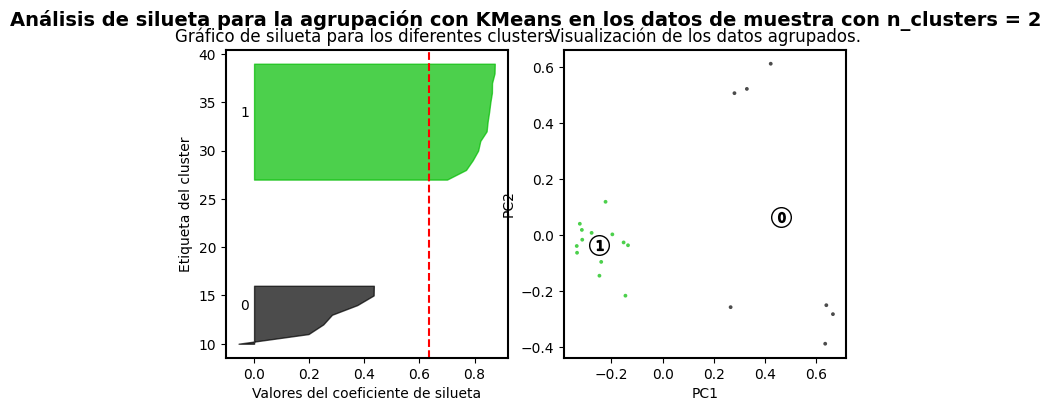

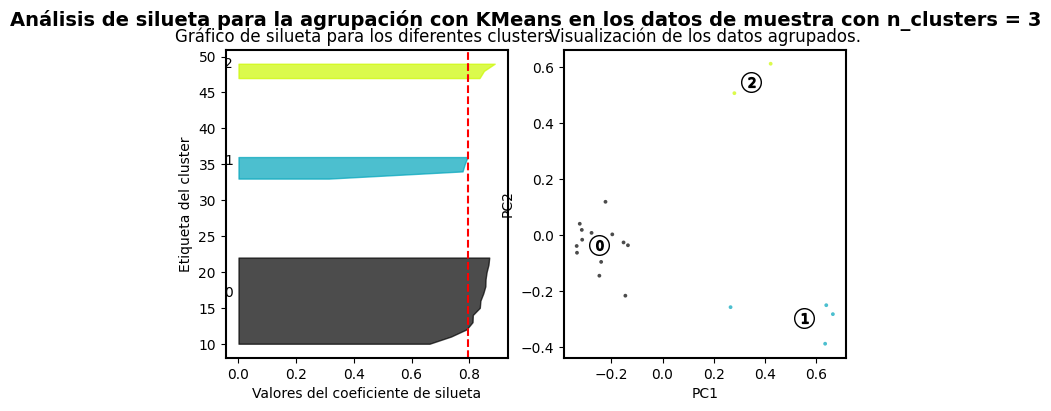

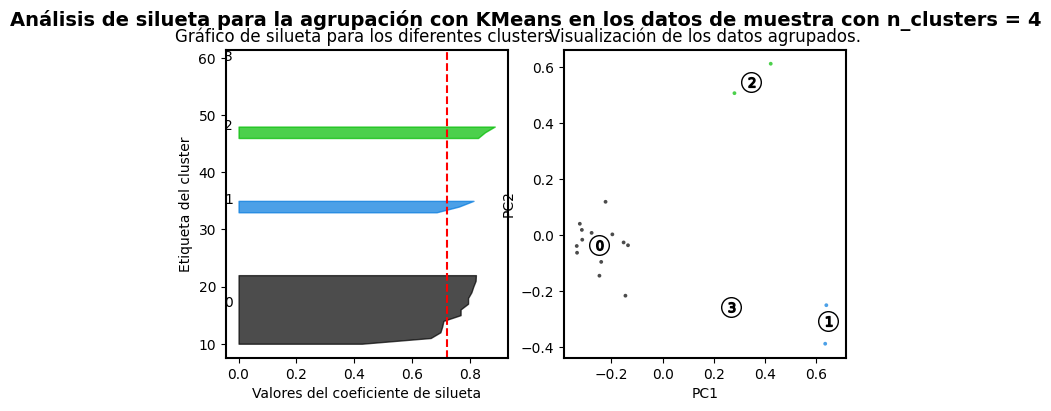

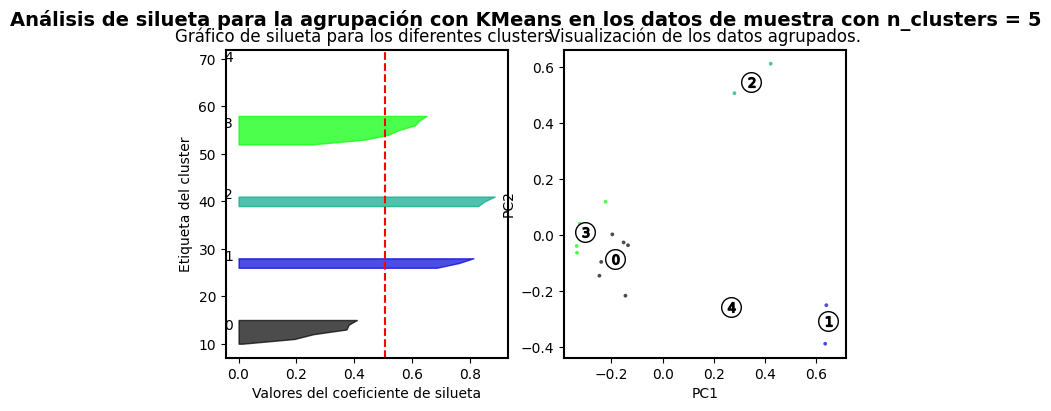

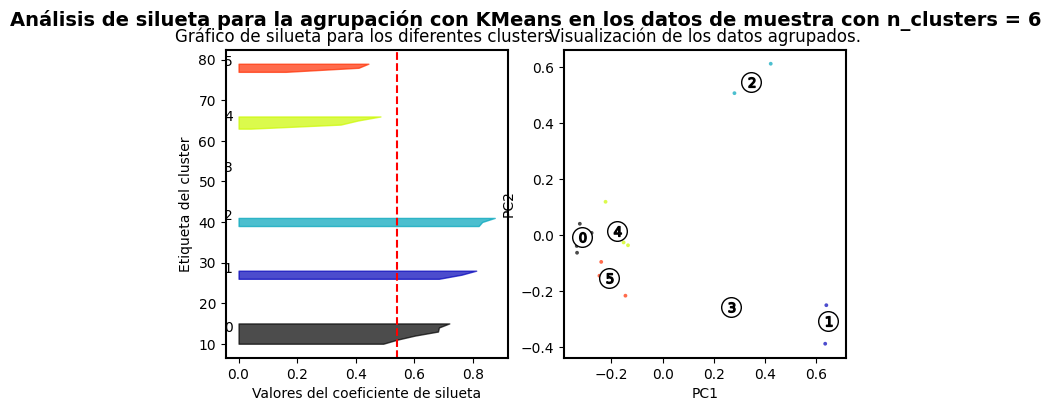

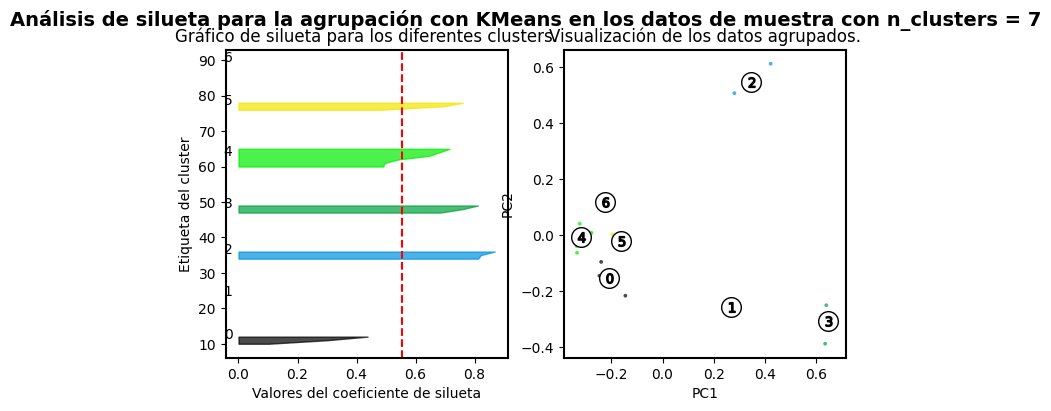

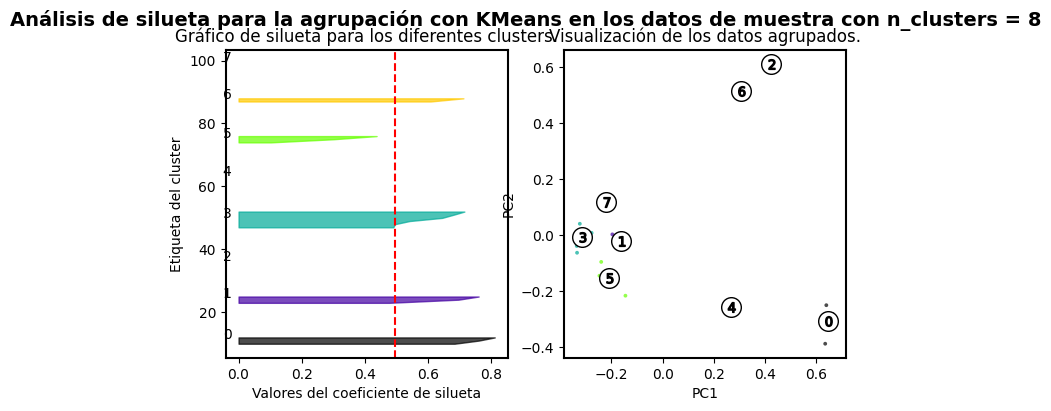

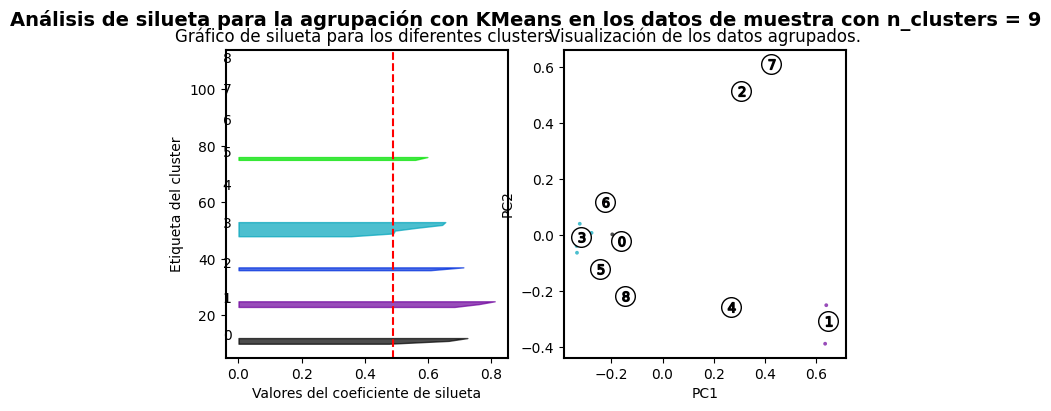

In [ ]:
# Realizamos el análisis de silueta para diferentes valores de K (número de clusters)
for n_clusters in range_K_clusters:
    warnings.filterwarnings('ignore', category=FutureWarning)
    # Creamos una figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(8, 4)

    # Creamos una instancia del algoritmo KMeans con el número de clusters deseado
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)

    # Aplicamos el algoritmo a las componentes principales normalizadas
    cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized', 'PC2_normalized']])

    # Calculamos el coeficiente de silueta promedio para evaluar la calidad de los clusters
    silhouette_avg = silhouette_score(descriptors_pca[['PC1_normalized', 'PC2_normalized']], cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El coeficiente de silueta promedio es:", silhouette_avg)

    # Calculamos los valores de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(descriptors_pca[['PC1_normalized', 'PC2_normalized']], cluster_labels)

    y_lower = 10

    for i in range(n_clusters):
        # Agrupamos los valores de silueta para las muestras pertenecientes al cluster i y los ordenamos
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Definimos un color para el cluster i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiquetamos los gráficos de silueta con los números de cluster
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calculamos el nuevo valor de y_lower para el próximo gráfico
        y_lower = y_upper + 10  # 10 para las muestras con valor 0

    # Configuramos el primer subplot (gráfico de silueta)
    ax1.set_title("Gráfico de silueta para los diferentes clusters.")
    ax1.set_xlabel("Valores del coeficiente de silueta")
    ax1.set_ylabel("Etiqueta del cluster")

    # Agregamos una línea vertical para el coeficiente de silueta promedio
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Configuramos el segundo subplot (visualización de los clusters)
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'],
                marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Etiquetamos los clusters
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    # Iterar sobre los centroides de los clusters y graficarlos en el subplot ax2
    for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')
    # Configurar título y etiquetas de los ejes del subplot ax2
      ax2.set_title("Visualización de los datos agrupados.")
      ax2.set_xlabel("PC1")
      ax2.set_ylabel("PC2")

    # Configurar título principal de la figura con información del análisis de silueta
    plt.suptitle(("Análisis de silueta para la agrupación con KMeans en los datos de muestra con n_clusters = %d" % n_clusters),
                              fontsize=14, fontweight='bold')

# Mostrar la figura completa
plt.show()

In [ ]:
#Para n_clusters = 3 El coeficiente de silueta promedio es: 0.8


In [ ]:
#Definimos el número de clusters
n_clusters = 3

# Creamos una instancia del algoritmo K-means con el número de clústeres óptimo y una semilla aleatoria
kmeans = KMeans(n_clusters=n_clusters, random_state=10)

# Aplicamos el algoritmo K-means a las componentes principales PC1 y PC2 (valores normalizados)
clusters = kmeans.fit(descriptors_pca[['PC1_normalized','PC2_normalized']])

# Creamos un DataFrame vacío para almacenar la información de los clústeres
cluster_info = pd.DataFrame()

# Agregamos la columna 'ID' con los índices de la tabla original
cluster_info['ID'] = compuestos_final.index

# Agregamos la columna 'cluster' con las etiquetas de clúster asignadas por K-means
cluster_info['cluster'] = clusters.labels_

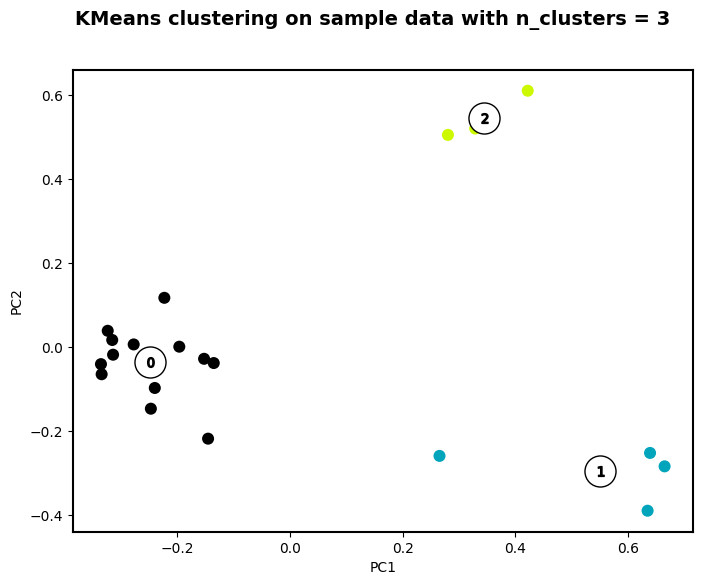

In [ ]:
# Creamos una figura con un único subplot
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

# Creamos una instancia del algoritmo K-means con el número de clústeres óptimo y una semilla aleatoria
kmeans = KMeans(n_clusters=n_clusters, random_state=10)

# Aplicamos el algoritmo K-means a las componentes principales PC1 y PC2 (valores normalizados)
cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized','PC2_normalized']])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
plt.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'],
                marker='.', s=300, lw=0, alpha=1,c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=500, edgecolor='k')

for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')
    # Establecemos las etiquetas de los ejes
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")

# Título principal de la figura
plt.suptitle(("KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')

# Guardamos la figura en un archivo
#plt.savefig('KMeans_clustering.png')

# Mostramos la figura
plt.show()

In [ ]:
# Agregamos la columna 'Cluster_PC1_PC2' al DataFrame 'descriptors_pca' con las etiquetas de los clusters
descriptors_pca['Cluster_PC1_PC2'] = clusters.labels_

# Agregamos la columna 'clusters' al DataFrame 'tabla_CHEMBL674637' con las etiquetas de los clusters
compuestos_final["Clusters PCA"]=clusters.labels_

In [ ]:
compuestos_final

,level_0,index,Unnamed: 0,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,...,HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,ROMol,Clusters PCA
0,0,0,0,CHEMBL3813912,NaN,NaN,Small molecule,NaN,316.32,1.0,...,1,0,316.0960,-0.99,NEUTRAL,C18H12N4O2,O=c1cc(/C=N/Nc2nncc3ccccc23)oc2ccccc12,RIPDTAWJDXDWMP-RGVLZGJSSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0624dd0>,0
1,1,1,1,CHEMBL4525888,NaN,NaN,Unknown,NaN,376.36,2.0,...,4,0,376.0947,1.05,ACID,C22H16O6,O=c1cc(-c2ccccc2)oc2c(Cc3cccc(O)c3O)c(O)cc(O)c12,MAFSHIJISCSKKD-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626110>,0
2,2,2,2,CHEMBL1878333,NaN,NaN,Small molecule,NaN,456.50,1.0,...,0,0,456.1685,-0.66,NEUTRAL,C27H24N2O5,COc1ccc(C2c3c(oc4c(C)cc(C)cc4c3=O)C(=O)N2Cc2cc...,YMYUZGRHZRTSFP-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0625bd0>,0
3,3,3,3,CHEMBL1734466,NaN,NaN,Small molecule,NaN,412.75,2.0,...,1,0,412.0325,-0.78,ACID,C19H12ClF3O5,CC(Oc1ccc2c(=O)c(-c3ccc(Cl)cc3)c(C(F)(F)F)oc2c...,YPROHFBQSFVDGY-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06261f0>,0
4,4,4,4,CHEMBL1487933,NaN,NaN,Small molecule,NaN,384.44,3.0,...,0,0,384.1474,-1.15,NEUTRAL,C24H20N2O3,Cc1cc(C)c2oc(C(=O)N(Cc3ccccc3)c3ccccn3)cc(=O)c2c1,XIEPHMPYYYCSBT-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06258c0>,0
5,5,5,5,CHEMBL1736532,NaN,NaN,Small molecule,NaN,410.30,3.0,...,1,0,410.0613,-0.47,ACID,C19H13F3O7,COc1ccc(Oc2c(C(F)(F)F)oc3cc(OCC(=O)O)ccc3c2=O)cc1,DKXOCIGOSILVPD-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626420>,0
6,6,6,6,CHEMBL1900694,NaN,NaN,Small molecule,NaN,414.30,3.0,...,1,0,413.0627,-0.06,ACID,C21H20BrNO3,O=c1c(-c2ccc(Br)cc2)coc2c(CN3CCCCC3)c(O)ccc12,HXCWKEAVTVPGAA-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06260a0>,0
7,7,7,7,CHEMBL1395132,NaN,NaN,Small molecule,NaN,442.35,4.0,...,1,1,441.0940,-0.32,ACID,C23H24BrNO3,Cc1oc2c(CN3CCCCC3C)c(O)ccc2c(=O)c1-c1ccc(Br)cc1,UTZOOJMZMLLULY-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626c00>,0
8,8,8,8,CHEMBL1345635,NaN,NaN,Small molecule,NaN,383.88,4.0,...,1,1,383.1288,-0.19,ACID,C22H22ClNO3,CC1CCCN(Cc2c(O)ccc3c(=O)c(-c4ccc(Cl)cc4)coc23)C1,CTFKKFIZHGGSNR-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06262d0>,0
9,9,9,9,CHEMBL1599285,NaN,NaN,Small molecule,NaN,438.46,4.0,...,1,0,438.1591,-1.02,NEUTRAL,C24H23FN2O5,O=C1c2oc3ccc(F)cc3c(=O)c2C(c2cccc(O)c2)N1CCCN1...,AXKVJTFILDQATN-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0625c40>,0


#Visualización de los compuestos en cada cluster

In [ ]:
compuestos_final_cluster0=compuestos_final.loc[compuestos_final["Clusters PCA"]==0]
compuestos_final_cluster1=compuestos_final.loc[compuestos_final["Clusters PCA"]==1]
compuestos_final_cluster2=compuestos_final.loc[compuestos_final["Clusters PCA"]==2]

In [ ]:
compuestos_final_cluster0

,level_0,index,Unnamed: 0,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,...,HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,ROMol,Clusters PCA
0,0,0,0,CHEMBL3813912,NaN,NaN,Small molecule,NaN,316.32,1.0,...,1,0,316.0960,-0.99,NEUTRAL,C18H12N4O2,O=c1cc(/C=N/Nc2nncc3ccccc23)oc2ccccc12,RIPDTAWJDXDWMP-RGVLZGJSSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0624dd0>,0
1,1,1,1,CHEMBL4525888,NaN,NaN,Unknown,NaN,376.36,2.0,...,4,0,376.0947,1.05,ACID,C22H16O6,O=c1cc(-c2ccccc2)oc2c(Cc3cccc(O)c3O)c(O)cc(O)c12,MAFSHIJISCSKKD-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626110>,0
2,2,2,2,CHEMBL1878333,NaN,NaN,Small molecule,NaN,456.50,1.0,...,0,0,456.1685,-0.66,NEUTRAL,C27H24N2O5,COc1ccc(C2c3c(oc4c(C)cc(C)cc4c3=O)C(=O)N2Cc2cc...,YMYUZGRHZRTSFP-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0625bd0>,0
3,3,3,3,CHEMBL1734466,NaN,NaN,Small molecule,NaN,412.75,2.0,...,1,0,412.0325,-0.78,ACID,C19H12ClF3O5,CC(Oc1ccc2c(=O)c(-c3ccc(Cl)cc3)c(C(F)(F)F)oc2c...,YPROHFBQSFVDGY-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06261f0>,0
4,4,4,4,CHEMBL1487933,NaN,NaN,Small molecule,NaN,384.44,3.0,...,0,0,384.1474,-1.15,NEUTRAL,C24H20N2O3,Cc1cc(C)c2oc(C(=O)N(Cc3ccccc3)c3ccccn3)cc(=O)c2c1,XIEPHMPYYYCSBT-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06258c0>,0
5,5,5,5,CHEMBL1736532,NaN,NaN,Small molecule,NaN,410.30,3.0,...,1,0,410.0613,-0.47,ACID,C19H13F3O7,COc1ccc(Oc2c(C(F)(F)F)oc3cc(OCC(=O)O)ccc3c2=O)cc1,DKXOCIGOSILVPD-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626420>,0
6,6,6,6,CHEMBL1900694,NaN,NaN,Small molecule,NaN,414.30,3.0,...,1,0,413.0627,-0.06,ACID,C21H20BrNO3,O=c1c(-c2ccc(Br)cc2)coc2c(CN3CCCCC3)c(O)ccc12,HXCWKEAVTVPGAA-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06260a0>,0
7,7,7,7,CHEMBL1395132,NaN,NaN,Small molecule,NaN,442.35,4.0,...,1,1,441.0940,-0.32,ACID,C23H24BrNO3,Cc1oc2c(CN3CCCCC3C)c(O)ccc2c(=O)c1-c1ccc(Br)cc1,UTZOOJMZMLLULY-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0626c00>,0
8,8,8,8,CHEMBL1345635,NaN,NaN,Small molecule,NaN,383.88,4.0,...,1,1,383.1288,-0.19,ACID,C22H22ClNO3,CC1CCCN(Cc2c(O)ccc3c(=O)c(-c4ccc(Cl)cc4)coc23)C1,CTFKKFIZHGGSNR-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f06262d0>,0
9,9,9,9,CHEMBL1599285,NaN,NaN,Small molecule,NaN,438.46,4.0,...,1,0,438.1591,-1.02,NEUTRAL,C24H23FN2O5,O=C1c2oc3ccc(F)cc3c(=O)c2C(c2cccc(O)c2)N1CCCN1...,AXKVJTFILDQATN-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7a73f0625c40>,0


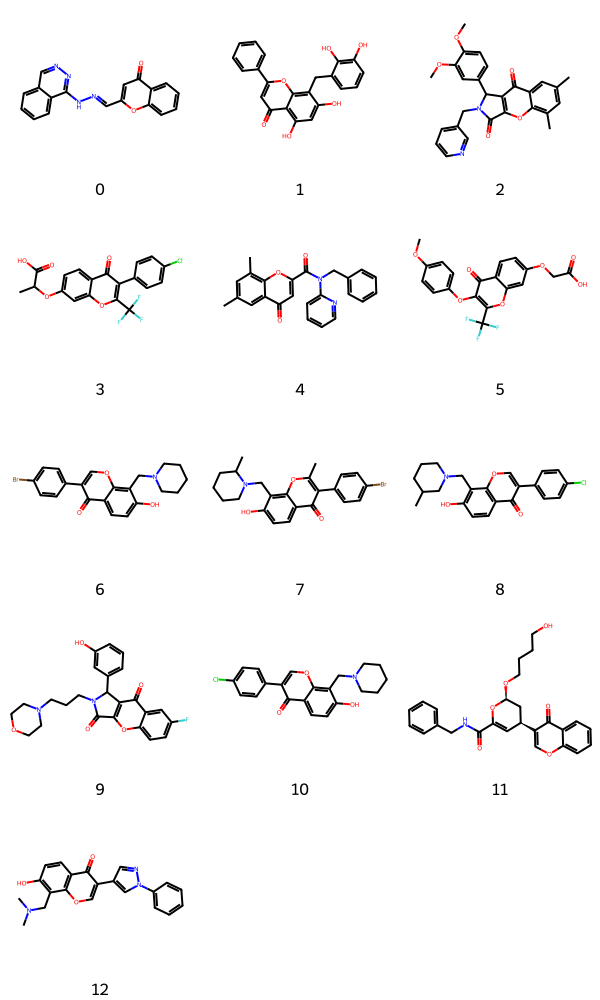

In [ ]:
Chem.Draw.MolsToGridImage(compuestos_final_cluster0['ROMol'], legends = [(str(compuestos_final_cluster0['level_0'][i])) for i in range(len(compuestos_final_cluster0))])

In [ ]:
compuestos_final_cluster1.set_index("index",inplace=True)
if 'level_0' in compuestos_final_cluster1.columns:
    compuestos_final_cluster1.rename(columns={'level_0': 'ID'}, inplace=True)

# Resetear el índice
cluster1_reset = compuestos_final_cluster1.reset_index()

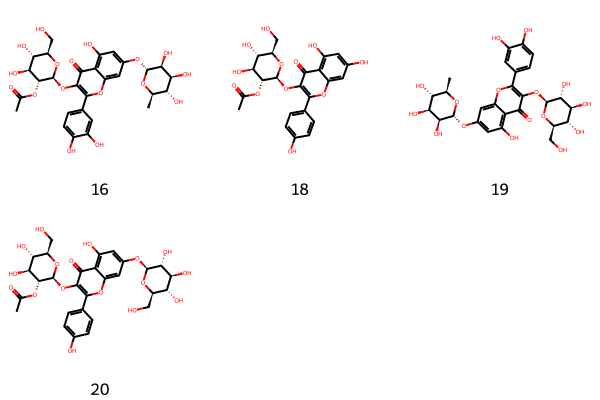

In [ ]:
Chem.Draw.MolsToGridImage(cluster1_reset['ROMol'], legends = [(str(cluster1_reset['index'][i])) for i in range(len(cluster1_reset))])

In [ ]:
compuestos_final_cluster2.set_index("index",inplace=True)
if 'level_0' in compuestos_final_cluster2.columns:
    compuestos_final_cluster2.rename(columns={'level_0': 'ID'}, inplace=True)

# Resetear el índice
cluster2_reset = compuestos_final_cluster2.reset_index()


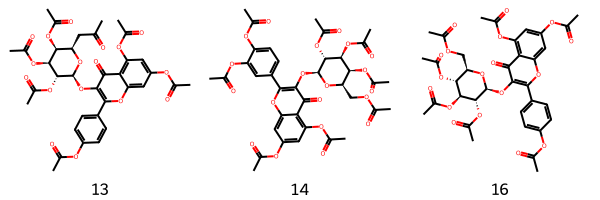

In [ ]:
Chem.Draw.MolsToGridImage(cluster2_reset['ROMol'], legends = [(str(cluster2_reset['ID'][i])) for i in range(len(cluster2_reset))])

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(columns=["Prot_ID","Genome_ID","Recolection_Mode","Isoform","Match our protein",
                                "Exon_Number","Position_In_Genome",
                                "Position_In_Sequence","Header_Genome","Notes"],)

In [ ]:
df2 = {"Prot_ID":"1","Genome_ID":"1","Recolection_Mode":"1","Isoform":"2","Match our protein":"3","Exon_Number":"4","Position_In_Genome":"5","Position_In_Sequence":"5","Header_Genome":"7","Notes":"8"}

In [ ]:
df = df.append(df2, ignore_index=True)
df

<ipython-input-23-82fff2073c2e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


,Prot_ID,Genome_ID,Recolection_Mode,Isoform,Match our protein,Exon_Number,Position_In_Genome,Position_In_Sequence,Header_Genome,Notes
0,1,1,1,2,3,4,5,5,7,8
1,1,1,1,2,3,4,5,5,7,8
